[fedstat.ru](https://www.fedstat.ru/indicator/31293) (ЕМИСС - Единая межведомственная информационно-статистическая система)<br>
[Продолжительность жизни в субъектах РФ](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_субъектах_Российской_Федерации)<br>
[цвета](http://mal-bioit.ru/programs/small/survey-web-colors.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple
import math

In [2]:
pd.options.display.max_columns = 100

DESTINATION_OUTPUT = 'show'
HOR_LINES = [1991, 1998, 2000, 2019]

In [3]:
df_all = pd.read_excel('data/Rosstat_by_region_and_year.xls', index_col=0, skiprows=2)

print(df_all.shape)
df_all.head(2)

(108, 34)


Unnamed: 1     Unnamed: 2  1990  1991  1992  \
Российская Федерация                Оба пола  все население  69.2  68.9  67.8   
    Центральный федеральный округ   Оба пола  все население  69.5  69.2  68.3   

                                   1993  1994  1995  1996  1997  1998  1999  \
Российская Федерация               65.0  63.9  64.5  65.8  66.7  67.1  65.9   
    Центральный федеральный округ  65.6  64.2  64.9  66.5  67.4  67.6  66.4   

                                   2000  2001  2002  2003  2004  2005  2006  \
Российская Федерация               65.3  65.2  65.0  64.9  65.3  65.4  66.7   
    Центральный федеральный округ  66.1  65.8  65.6  65.7  66.3  66.5  67.6   

                                   2007  2008  2009  2010   2011   2012  \
Российская Федерация               67.6  68.0  68.8  68.9  69.83  70.24   
    Центральный федеральный округ  68.4  68.8  69.7  69.9  71.19  71.43   

                                    2013   2014   2015   2016   2017   2018  \
Российская Федерация               70.76  70.93  71.39  71.87  72.70  72.91   
    Центральный федеральный округ  71.93  72.10  72.72  73.07  73.89  74.01   

                                    2019   2020   2021  
Российская Федерация               73.34  71.54  70.06  
    Центральный федеральный округ  74.54  72.57  70.85

In [4]:
# Clean names of regions from surrounding spaces
df_all.index = df_all.index.map(lambda st: st.strip())

# drop redundant columns
df_all.drop(['Unnamed: 1', 'Unnamed: 2'], axis='columns', inplace=True)

# transform name of columns to integers for more convenience
df_all.columns = df_all.columns.map(int)

# remove some records
df_all.drop(index=[
    'Коми-Пермяцкий округ, входящий в состав Пермского края',
    'Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)',
    'Эвенкийский автономный округ (Красноярский край)',
    'Усть-Ордынский Бурятский округ',
    'Агинский Бурятский округ (Забайкальский край)',
    'Корякский округ, входящий в состав Камчатского края',
    'Крымский федеральный округ'], inplace=True)

# rename some regions
df_all = df_all.rename(index={
    'Российская Федерация': 'Россия',
    'Центральный федеральный округ': 'Центральный ФО',
    'Северо-Западный федеральный округ': 'Северо-Западный ЗФО',
    'Северо-Кавказский федеральный округ': 'Северо-Кавказский ФО',
    'Приволжский федеральный округ': 'Приволжский ФО',
    'Уральский федеральный округ': 'Уральский ФО',
    'Сибирский федеральный округ': 'Сибирский ФО',
    'Дальневосточный федеральный округ': 'Дальневосточный ФО',
    'Город Москва столица Российской Федерации город федерального значения': 'Москва',
    'Город Санкт-Петербург город федерального значения': 'Санкт-Петербург',
    'Город федерального значения Севастополь': 'Севастополь',
    'Архангельская область (кроме Ненецкого автономного округа)': 'Архангельская область (без АО)',
    'Ненецкий автономный округ (Архангельская область)': 'Ненецкий АО',
    'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)': 'Тюменская область (без 2 АО)',
    'Ханты-Мансийский автономный округ - Югра (Тюменская область)': 'Югра',
    'Ямало-Ненецкий автономный округ (Тюменская область)': 'Ямало-Ненецкий АО',
    'Кемеровская область - Кузбасс': 'Кузбасс',
    'Республика Башкортостан': 'Башкортостан',
    'Республика Татарстан (Татарстан)': 'Татарстан',
    'Республика Дагестан': 'Дагестан',
     # 'Республика Крым': 'Крым',
    'Чеченская Республика': 'Чечня',
    'Удмуртская Республика': 'Удмуртия',
    'Чувашская Республика - Чувашия': 'Чувашия',
    'Республика Саха (Якутия)': 'Якутия',
    'Республика Бурятия': 'Бурятия',
    'Кабардино-Балкарская Республика': 'Кабардино-Балкария',
    'Республика Коми': 'Коми',
    'Республика Мордовия': 'Мордовия',
    'Республика Северная Осетия-Алания': 'Северная Осетия',
    'Республика Марий Эл': 'Марий Эл',
    'Республика Карелия': 'Карелия',
    'Республика Хакасия': 'Хакасия',
    'Республика Ингушетия': 'Ингушетия',
    'Республика Адыгея (Адыгея)': 'Адыгея',
    'Карачаево-Черкесская Республика': 'Карачаево-Черкесия',
    'Республика Тыва': 'Тыва',
    'Республика Калмыкия': 'Калмыкия',
    'Республика Алтай': 'Алтай',
    'Еврейская автономная область': 'Еврейская авт. обл.',
    'Чукотский автономный округ': 'Чукотка'
})

# In 2018 Buryatia and Zabaykalsky Krai were moved from the Siberian FD to the Far Eastern.
# The South FD had more changes.
# Combine average values before and after these events are not completele correct, but for simplicity made that.
ser_sibfo = pd.concat([df_all.loc['Сибирский ФО'].iloc[0].loc[:2017], df_all.loc['Сибирский ФО'].iloc[1].loc[2018:]])
ser_fefo = pd.concat([df_all.loc['Дальневосточный ФО'].iloc[0].loc[:2017], df_all.loc['Дальневосточный ФО'].iloc[1].loc[2018:]])
ser_s = pd.concat([df_all.loc['Южный федеральный округ (с 2010 года)'].loc[2003:2015], df_all.loc['Южный федеральный округ (с 29.07.2016)'].loc[2016:]])
ser_s.name = 'Южный ФО'
df_all.drop(index=['Сибирский ФО', 'Дальневосточный ФО', 'Южный федеральный округ (по 2009 год)', 'Южный федеральный округ (с 2010 года)', 'Южный федеральный округ (с 29.07.2016)'], inplace=True)
df_all = df_all.append([ser_sibfo, ser_fefo, ser_s])

# Remove values for Chechnya 1990-1992 - strange values, and they make the chart messy
# import numpy as np
# df_all.loc['Чечня', 1990:1992] = np.NaN

print(df_all.shape)
df_all.fillna('')

(97, 32)


1990  1991  1992  1993  1994  1995  1996  \
Россия                            69.2  68.9  67.8  65.0  63.9  64.5  65.8   
Центральный ФО                    69.5  69.2  68.3  65.6  64.2  64.9  66.5   
Белгородская область              70.2  69.8  69.1  67.4  67.2  68.0  68.7   
Брянская область                  69.6  69.3  68.6  66.2  65.1  66.3  66.8   
Владимирская область              69.5  69.3  68.1  65.8  64.4  64.9  66.1   
...                                ...   ...   ...   ...   ...   ...   ...   
Чукотка                           68.0  67.2  64.2  60.5  60.8  59.8  58.4   
Чеченская и Ингушская Республики  69.7  69.8  70.4                           
Сибирский ФО                      67.9  67.7  66.3  63.2  61.8  62.8  63.7   
Дальневосточный ФО                67.2  66.9  65.3  62.5  61.7  61.8  62.9   
Южный ФО                                                                     

                                  1997  1998  1999  2000  2001  2002  2003  \
Россия                            66.7  67.1  65.9  65.3  65.2  65.0  64.9   
Центральный ФО                    67.4  67.6  66.4  66.1  65.8  65.6  65.7   
Белгородская область              69.0  69.3  68.3  68.1  67.5  67.6  68.0   
Брянская область                  66.2  66.3  65.1  64.7  64.9  63.8  64.3   
Владимирская область              66.5  66.6  64.3  63.4  63.1  62.2  62.7   
...                                ...   ...   ...   ...   ...   ...   ...   
Чукотка                           61.6  60.3  61.6  60.2  55.3  58.0  59.1   
Чеченская и Ингушская Республики                                             
Сибирский ФО                      64.7  65.4  64.1  63.7  63.6  63.1  62.8   
Дальневосточный ФО                64.2  64.6  63.8  63.2  62.8  62.6  62.3   
Южный ФО                                                              66.6   

                                  2004  2005  2006  2007  2008  2009  2010  \
Россия                            65.3  65.4  66.7  67.6  68.0  68.8  68.9   
Центральный ФО                    66.3  66.5  67.6  68.4  68.8  69.7  69.9   
Белгородская область              68.2  68.4  69.3  70.4  70.5  71.1  71.3   
Брянская область                  64.2  63.4  65.3  66.1  66.5  67.8  67.9   
Владимирская область              63.0  63.5  64.7  65.6  65.8  66.6  67.1   
...                                ...   ...   ...   ...   ...   ...   ...   
Чукотка                           57.7  58.5  59.6  59.4  60.3  58.8  57.5   
Чеченская и Ингушская Республики                                             
Сибирский ФО                      63.2  62.7  64.6  65.7  66.1  66.9  67.1   
Дальневосточный ФО                62.3  62.2  63.8  64.8  64.9  65.7  65.8   
Южный ФО                          67.1  67.1  68.1  68.8  69.3  70.0  70.1   

                                   2011   2012   2013   2014   2015   2016  \
Россия                            69.83  70.24  70.76  70.93  71.39  71.87   
Центральный ФО                    71.19  71.43  71.93   72.1  72.72  73.07   
Белгородская область              71.71  71.91  72.16  72.25  72.61  72.87   
Брянская область                  68.83  69.06  69.75  69.42  70.36  70.92   
Владимирская область              68.08   68.6  69.13  69.25  69.82  70.28   
...                                 ...    ...    ...    ...    ...    ...   
Чукотка                           61.58  60.79  62.11  62.32  64.16  64.42   
Чеченская и Ингушская Республики                                             
Сибирский ФО                      67.72  67.99  68.63  68.85  69.31  69.81   
Дальневосточный ФО                66.36   67.0  67.81  68.21  68.68  69.22   
Южный ФО                          70.65  71.26  71.76  71.74  72.13  72.29   

                                   2017   2018   2019   2020   2021  
Россия                             72.7  72.91  73.34  71.54  70.06  
Центральный ФО                    73.89  74.01  74.54  72.57  70.85  
Белгородская область              73.67  73.67  74.21  72.37  70.67  
Брянск

<br />
<br />
<br />

In [5]:
# Just for interest look at average life expectancy in fereral districts
df_all.loc[['Россия',
            'Центральный ФО',
            'Северо-Западный ЗФО',
            'Южный ФО',
            'Северо-Кавказский ФО',
            'Приволжский ФО',
            'Уральский ФО',
            'Сибирский ФО',
            'Дальневосточный ФО']] \
    .sort_values(by=2021, ascending=False)        \
    .fillna('')

1990  1991  1992  1993  1994  1995  1996  1997  1998  \
Северо-Кавказский ФО                                                         
Центральный ФО        69.5  69.2  68.3  65.6  64.2  64.9  66.5  67.4  67.6   
Северо-Западный ЗФО   69.1  68.9  67.0  63.5  62.5  63.7  65.6  67.1  67.2   
Южный ФО                                                                     
Россия                69.2  68.9  67.8  65.0  63.9  64.5  65.8  66.7  67.1   
Уральский ФО          69.4  69.0  67.6  64.8  63.6  64.0  65.2  66.6  67.0   
Приволжский ФО        69.9  69.6  68.5  66.0  64.8  65.3  66.5  67.1  67.6   
Сибирский ФО          67.9  67.7  66.3  63.2  61.8  62.8  63.7  64.7  65.4   
Дальневосточный ФО    67.2  66.9  65.3  62.5  61.7  61.8  62.9  64.2  64.6   

                      1999  2000  2001  2002  2003  2004  2005  2006  2007  \
Северо-Кавказский ФО                          68.9  69.7  69.9  70.4  71.4   
Центральный ФО        66.4  66.1  65.8  65.6  65.7  66.3  66.5  67.6  68.4   
Северо-Западный ЗФО   65.5  64.5  64.2  63.8  63.3  63.9  64.2  65.8  67.2   
Южный ФО                                      66.6  67.1  67.1  68.1  68.8   
Россия                65.9  65.3  65.2  65.0  64.9  65.3  65.4  66.7  67.6   
Уральский ФО          65.7  64.6  65.0  64.6  64.5  65.0  65.2  66.7  67.5   
Приволжский ФО        66.4  65.5  65.5  65.2  65.0  65.2  65.3  66.5  67.2   
Сибирский ФО          64.1  63.7  63.6  63.1  62.8  63.2  62.7  64.6  65.7   
Дальневосточный ФО    63.8  63.2  62.8  62.6  62.3  62.3  62.2  63.8  64.8   

                      2008  2009  2010   2011   2012   2013   2014   2015  \
Северо-Кавказский ФО  71.8  71.8  72.2  72.62  73.22  73.95  74.11  74.63   
Центральный ФО        68.8  69.7  69.9  71.19  71.43  71.93  72.10  72.72   
Северо-Западный ЗФО   67.6  68.5  68.9  70.07  70.57  71.25  71.42  71.70   
Южный ФО              69.3  70.0  70.1  70.65  71.26  71.76  71.74  72.13   
Россия                68.0  68.8  68.9  69.83  70.24  70.76  70.93  71.39   
Уральский ФО          67.7  68.5  68.8  69.42  69.65  70.06  70.20  70.38   
Приволжский ФО        67.6  68.5  68.4  69.24  69.79  70.06  70.20  70.71   
Сибирский ФО          66.1  66.9  67.1  67.72  67.99  68.63  68.85  69.31   
Дальневосточный ФО    64.9  65.7  65.8  66.36  67.00  67.81  68.21  68.68   

                       2016   2017   2018   2019   2020   2021  
Северо-Кавказский ФО  75.13  75.86  76.25  76.64  74.58  73.79  
Центральный ФО        73.07  73.89  74.01  74.54  72.57  70.85  
Северо-Западный ЗФО   72.16  72.97  73.30  73.72  72.02  70.37  
Южный ФО              72.29  73.16  73.54  73.73  72.09  70.21  
Россия                71.87  72.70  72.91  73.34  71.54  70.06  
Уральский ФО          70.82  71.85  72.01  72.52  70.81  69.61  
Приволжский ФО        71.39  72.26  72.41  72.94  70.83  69.50  
Сибирский ФО          69.81  70.50  70.73  71.12  69.60  68.30  
Дальневосточный ФО    69.22  70.09  70.20  70.22  69.15  68.06

<br />
<br />
<br />

In [6]:
dd_to_eng = {
    'Центральный ФО': 'Central FD',
    'Северо-Западный ФО': 'Northwestern FD',
    'Южный ФО': 'Southern FD',
    'Северо-Кавказский ФО': 'North Caucasian FD',
    'Приволжский ФО': 'Volga FD',
    'Уральский ФО': 'Ural FD',
    'Сибирский ФО': 'Siberian FD',
    'Дальневосточный ФО': 'Far Eastern FD',
    'Ингушетия': 'Ingushetia',
    'Республика Ингушетия': 'Republic of Ingushetia',
    'Дагестан': 'Dagestan',
    'Республика Дагестан': 'Republic of Dagestan',
    'Москва': 'Moscow',
    'город федерального значения Москва': 'federal city Moscow',
    'Кабардино-Балкария': 'Kabardino-Balkaria',
    'Кабардино-Балкарская Республика': 'Kabardino-Balkarian Republic',
    'Карачаево-Черкесия': 'Karachay-Cherkessia',
    'Карачаево-Черкесская Республика': 'Karachay-Cherkess Republic',
    'Чечня': 'Chechnya',
    'Чеченская Республика': 'Chechen Republic',
    'Санкт-Петербург': 'Saint Petersburg',
    'город федерального значения Санкт-Петербург': 'federal city Saint Petersburg',
    'Северная Осетия': 'North Ossetia',
    'Республика Северная Осетия-Алания': 'Republic of North Ossetia–Alania',
    'Севастополь': 'Sevastopol',
    'город федерального значения Севастополь': 'federal city Sevastopol',
    'Югра': 'Yugra',
    'Ханты-Мансийский АО - Югра (Тюменская область)': 'Khanty-Mansi AO–Yugra (Tyumen Oblast)',
    'Ямало-Ненецкий АО': 'Yamalo-Nenets AO',
    'Ямало-Ненецкий АО (Тюменская область)': 'Yamalo-Nenets AO (Tyumen Oblast)',
    'Ставропольский край': 'Stavropol Krai',
    'Калмыкия': 'Kalmykia',
    'Республика Калмыкия': 'Republic of Kalmykia',
    'Татарстан': 'Tatarstan',
    'Республика Татарстан': 'Republic of Tatarstan',
    'Адыгея': 'Adygea',
    'Республика Адыгея': 'Republic of Adygea',
    'Калининградская область': 'Kaliningrad Oblast',
    'Белгородская область': 'Belgorod Oblast',
    'Краснодарский край': 'Krasnodar Krai',
    'Московская область': 'Moscow Oblast',
    'Мордовия': 'Mordovia',
    'Республика Мордовия': 'Republic of Mordovia',
    'Ленинградская область': 'Leningrad Oblast',
    'Тюменская область (без 2 АО)': 'Tyumen Oblast (except 2 AO)',
    'Тюменская область (без двух АО)': 'Tyumen Oblast (except two AO)',
    'Удмуртия': 'Udmurtia',
    'Удмуртская Республика': 'Udmurt Republic',
    'Чувашия': 'Chuvashia',
    'Чувашская Республика': 'Chuvash Republic',
    'Якутия': 'Yakutia',
    'Республика Саха (Якутия)': 'Republic of Sakha (Yakutia)',
    'Пензенская область': 'Penza Oblast',
    'Волгоградская область': 'Volgograd Oblast',
    'Астраханская область': 'Astrakhan Oblast',
    'Тамбовская область': 'Tambov Oblast',
    'Ростовская область': 'Rostov Oblast',
    'Кировская область': 'Kirov Oblast',
    'Томская область': 'Tomsk Oblast',
    'Крым': 'Crimea',
    'Республика Крым': 'Republic of Crimea',
    'Архангельская область (без АО)': 'Arkhangelsk Oblast (except AO)',
    'Башкортостан': 'Bashkortostan',
    'Республика Башкортостан': 'Republic of Bashkortostan',
    'Воронежская область': 'Voronezh Oblast',
    'Марий Эл': 'Mari El',
    'Республика Марий Эл': 'Mari El Republic',
    'Ненецкий АО': 'Nenets AO',
    'Ненецкий АО (Архангельская область)': 'Nenets AO (Arkhangelsk Oblast)',
    'Самарская область': 'Samara Oblast',
    'Новосибирская область': 'Novosibirsk Oblast',
    'Калужская область': 'Kaluga Oblast',
    'Челябинская область': 'Chelyabinsk Oblast',
    'Саратовская область': 'Saratov Oblast',
    'Вологодская область': 'Vologda Oblast',
    'Ярославская область': 'Yaroslavl Oblast',
    'Ульяновская область': 'Ulyanovsk Oblast',
    'Ивановская область': 'Ivanovo Oblast',
    'Омская область': 'Omsk Oblast',
    'Тульская область': 'Tula Oblast',
    'Орловская область': 'Oryol Oblast',
    'Нижегородская область': 'Nizhny Novgorod Oblast',
    'Бурятия': 'Buryatia',
    'Республика Бурятия': 'Republic of Buryatia',
    'Свердловская область': 'Sverdlovsk Oblast',
    'Костромская область': 'Kostroma Oblast',
    'Брянская область': 'Bryansk Oblast',
    'Рязанская область': 'Ryazan Oblast',
    'Приморский край': 'Primorsky Krai',
    'Алтайский край': 'Altai Krai',
    'Липецкая область': 'Lipetsk Oblast',
    'Курская область': 'Kursk Oblast',
    'Пермский край': 'Perm Krai',
    'Хакасия': 'Khakassia',
    'Республика Хакасия': 'Republic of Khakassia',
    'Сахалинская область': 'Sakhalin Oblast',
    'Красноярский край': 'Krasnoyarsk Krai',
    'Коми': 'Komi',
    'Республика Коми': 'Komi Republic',
    'Курганская область': 'Kurgan Oblast',
    'Мурманская область': 'Murmansk Oblast',
    'Оренбургская область': 'Orenburg Oblast',
    'Владимирская область': 'Vladimir Oblast',
    'Камчатский край': 'Kamchatka Krai',
    'Смоленская область': 'Smolensk Oblast',
    'Тверская область': 'Tver Oblast',
    'Алтай': 'Altai',
    'Республика Алтай': 'Altai Republic',
    'Хабаровский край': 'Khabarovsk Krai',
    'Псковская область': 'Pskov Oblast',
    'Новгородская область': 'Novgorod Oblast',
    'Кузбасс': 'Kuzbass',
    'Кемеровская область - Кузбасс': 'Kemerovo Oblast–Kuzbass',
    'Магаданская область': 'Magadan Oblast',
    'Карелия': 'Karelia',
    'Республика Карелия': 'Republic of Karelia',
    'Тыва': 'Tuva',
    'Республика Тыва': 'Tyva Republic',
    'Забайкальский край': 'Zabaykalsky Krai',
    'Иркутская область': 'Irkutsk Oblast',
    'Амурская область': 'Amur Oblast',
    'Еврейская авт. обл.': 'Jewish Autonomous Oblast',
    'Еврейская автономная область': 'Jewish Autonomous Oblast',
    'Чукотка': 'Chukotka',
    'Чукотский автономный округ': 'Chukotka Autonomous Okrug',
    'Россия (Росстат)': 'Russia (Rosstat)',
    'Россия (Группа Всемирного банка)': 'Russia (World Bank Group)',
    'Грузия': 'Georgia',
    'Азербайджан': 'Azerbaijan',
    'Армения': 'Armenia'
}

In [7]:
TitlePars  = namedtuple('TitlePars', ['label', 'fontsize'], defaults=('', 14))
LagendPars = namedtuple('LagendPars', ['loc', 'fontsize', 'ncol'], defaults=('best', 12, 1))
ChartLim   = namedtuple('ChartLim', ['bottom', 'up'], defaults=(50, 80))

def create_chart(df, ls_subjects, *, figure_size, title, legend, chart_lim=None, chart_linewidth=3, linestyles=None, lang='ru', hor_lines=HOR_LINES,
                 xticks_size=13, yticks_size=11.5, label_x_rotation='vertical', destination=DESTINATION_OUTPUT, file_name='chart.png'):
    plt.rcParams['figure.figsize'] = figure_size

    year_min = df.columns[0]
    year_max = df.columns[-1]

    ylim_min = df.loc[ls_subjects].min().min()
    ylim_max = df.loc[ls_subjects].max().max()
    print(f"min: {ylim_min:.2f}, max: {ylim_max:.2f}")
    
    # if limits for y-axes is not given, calculate optimal values
    if not chart_lim:
        
        if ylim_min % 1 < 0.65:
            ylim_min = math.floor(ylim_min)
        else:
            ylim_min -= 0.15   

        if ylim_max % 1 > 0.25:
            ylim_max = math.ceil(ylim_max)
        else:
            ylim_max += 0.15

        chart_lim = ChartLim(bottom=ylim_min, up=ylim_max)
    
    ylim_bottom_label = math.ceil(chart_lim.bottom)
    ylim_up_label = math.floor(chart_lim.up)

    plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, pad=1.5, reset=True)
    plt.tick_params(axis='x', which='both', pad=1.5)

    plt.xlim(year_min, year_max)
    plt.grid(color='wheat', linewidth=0.25)
        
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        plt.axvline(x=year, color='lightgrey', linewidth=0.8 if year == 2000 else 0.4 , zorder=0)
        
    for age in range(ylim_bottom_label - ylim_bottom_label % 5 + 5,ylim_up_label, 5):
        plt.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)

    for year in hor_lines:
        plt.axvline(x=year, color='wheat', linewidth=2, alpha=0.25, zorder=0)

    labels_x = range(year_min, year_max+1)
    labels_y = range(ylim_bottom_label, ylim_up_label+1)
    plt.ylim(chart_lim.bottom, chart_lim.up)
    plt.xticks(labels_x, fontsize=xticks_size, rotation=label_x_rotation)
    plt.yticks(labels_y, fontsize=yticks_size)
    
    plt.title(label=title.label, fontsize=title.fontsize)
    
    if not linestyles:
        linestyles = ['-'] * len(ls_subjects)
    
    for z, subject, color, linestyle in zip(range(len(ls_subjects),0,-1), ls_subjects.keys(), ls_subjects.values(), linestyles):
        plt.plot(df.columns, df.loc[subject], linestyle=linestyle, color=color, linewidth=chart_linewidth if linestyle=='-' else chart_linewidth * 0.6,
                 label=dd_to_eng[subject] if lang=='en' else subject, zorder=z)
    
    plt.legend(loc=legend.loc, fontsize=legend.fontsize, ncol=legend.ncol)
    
    if destination == 'file':
        plt.savefig('output_groups/'+file_name, bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()

<br />
<br />
<br />

Explore the [North Caucasian Federal District](https://en.wikipedia.org/wiki/North_Caucasian_Federal_District) ([Северо-Кавказский федеральный округ](https://ru.wikipedia.org/wiki/Северо-Кавказский_федеральный_округ))

In [8]:
# Comparison subjects of the North Caucasian Federal District
df = df_all.loc[['Дагестан',
                 'Ингушетия',
                 'Кабардино-Балкария',
                 'Карачаево-Черкесия',
                 'Северная Осетия',
                 'Чечня',
                 'Ставропольский край',
                 'Чеченская и Ингушская Республики']] \
    .sort_values(by=2021, ascending=False)

df.fillna('')

1990  1991  1992  1993  1994  1995  1996  \
Ингушетия                                                       68.8  68.8   
Дагестан                          73.1  72.6  72.1  70.5  70.5  70.4  70.3   
Кабардино-Балкария                71.0  70.5  70.6  68.9  68.7  68.8  68.8   
Карачаево-Черкесия                72.3  71.9  71.4  69.9  69.1  69.5  69.0   
Чечня                             69.7  69.8  70.4                           
Северная Осетия                   71.3  70.5  69.7  67.9  67.2  66.5  67.1   
Ставропольский край               69.6  69.3  69.0  67.3  66.7  66.7  67.4   
Чеченская и Ингушская Республики  69.7  69.8  70.4                           

                                  1997  1998  1999  2000  2001  2002  2003  \
Ингушетия                         69.5  67.9  70.2  72.0  74.8  74.4  74.4   
Дагестан                          70.5  70.5  70.6  71.0  71.9  71.9  72.3   
Кабардино-Балкария                69.6  69.5  69.2  69.1  69.2  69.1  68.8   
Карачаево-Черкесия                69.0  69.3  68.7  68.4  69.1  68.7  68.2   
Чечня                                                                 69.1   
Северная Осетия                   67.4  68.0  67.9  68.4  69.4  68.8  68.6   
Ставропольский край               68.2  68.5  68.1  68.0  67.8  67.1  66.9   
Чеченская и Ингушская Республики                                             

                                  2004  2005  2006  2007  2008  2009  2010  \
Ингушетия                         74.6  73.5  73.0  75.2  76.1  74.1  74.7   
Дагестан                          72.6  73.1  73.2  74.0  74.1  73.7  73.9   
Кабардино-Балкария                69.6  68.9  69.6  70.6  71.9  71.4  72.1   
Карачаево-Черкесия                69.8  69.6  70.7  71.9  72.2  72.3  72.4   
Чечня                             70.9  72.1  72.1  73.0  74.0  71.9  71.6   
Северная Осетия                   68.4  69.6  70.7  71.7  71.4  71.9  72.7   
Ставропольский край               67.8  67.8  68.3  69.6  69.8  70.4  71.0   
Чеченская и Ингушская Республики                                             

                                   2011   2012   2013   2014   2015   2016  \
Ингушетия                         76.29   77.8  78.84  79.42  80.05  80.82   
Дагестан                          74.26   74.9  75.63  75.83  76.39  77.23   
Кабардино-Балкария                72.44  73.27  73.71  74.16  74.61  75.12   
Карачаево-Черкесия                72.85  73.38  73.94  73.91  74.44  74.72   
Чечня                             72.13  71.88   73.2  73.06  73.45   74.2   
Северная Осетия                   72.59  73.41  73.94  73.82   74.2  75.05   
Ставропольский край               71.57  72.15  72.75  72.75  73.36   73.4   
Чеченская и Ингушская Республики                                             

                                   2017   2018   2019   2020   2021  
Ингушетия                         81.59  82.41   83.4  81.48  80.52  
Дагестан                          77.79  78.69   79.1  76.43  76.59  
Кабардино-Балкария                75.81  76.28  76.46  74.37  73.77  
Карачаево-Черкесия                75.94  76.09  76.21  74.82  73.47  
Чечня                             74.84  75.43  75.88  72.11   73.0  
Северная Осетия                   75.51  75.68  75.75  74.08  72.47  
Ставропольский край               74.19  74.18  74.66   73.2  71.66  
Чеченская и Ингушская Республики

min: 66.50, max: 83.40


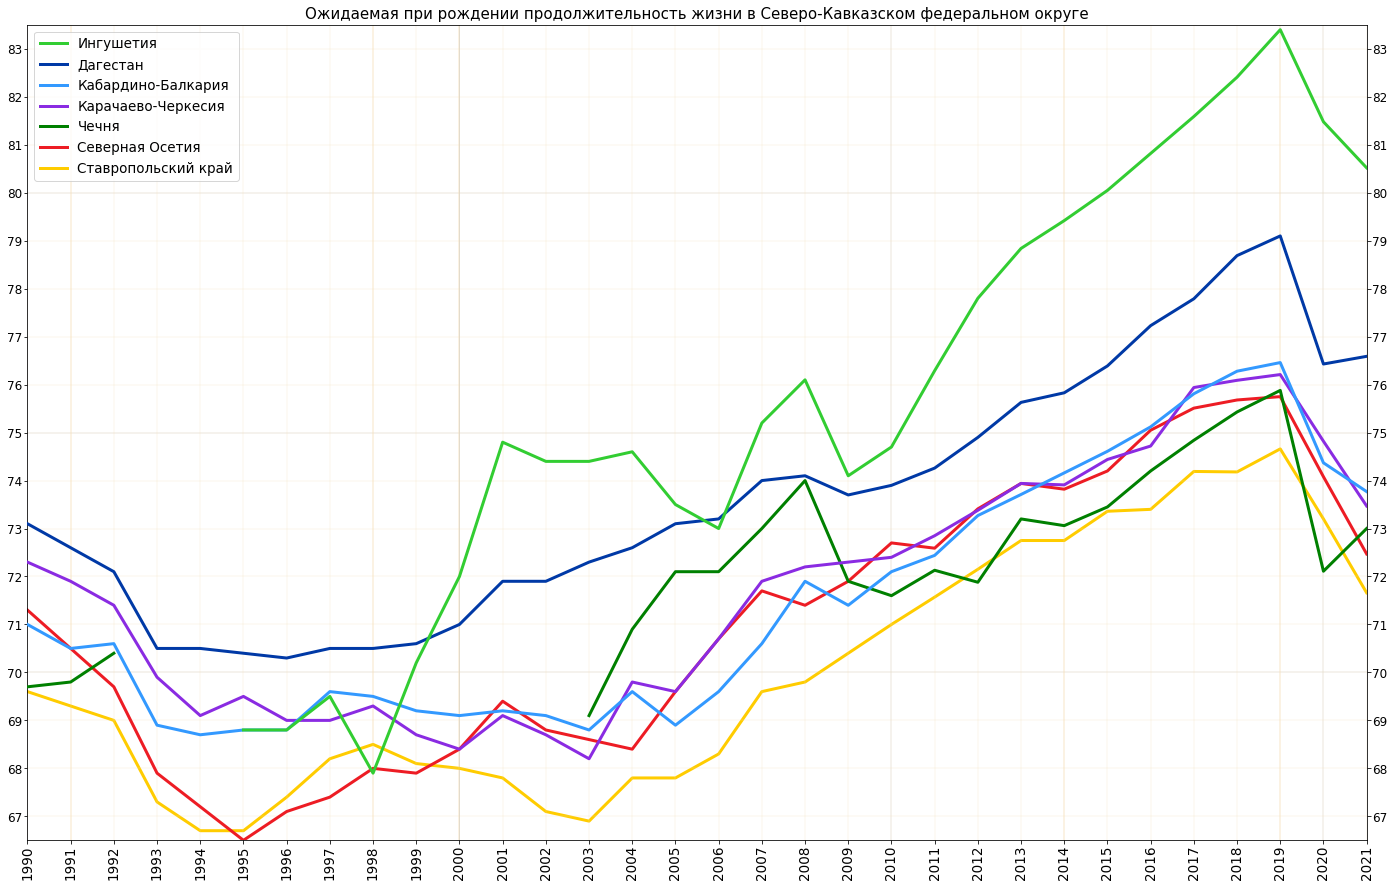

In [9]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Северо-Кавказском федеральном округе', fontsize=15)

ls_subjects = {'Ингушетия': 'limegreen',
               'Дагестан': '#0039a6',
               'Кабардино-Балкария': '#3399ff',
               'Карачаево-Черкесия': 'blueviolet',
               'Чечня': 'green',
               'Северная Осетия': '#ed1c24',
               'Ставропольский край': '#ffcc00'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=66.5, up=83.5)
hor_lines = [1991, 1998, 2000, 2014, 2019]

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -NCFD -ru.png')

min: 66.50, max: 83.40


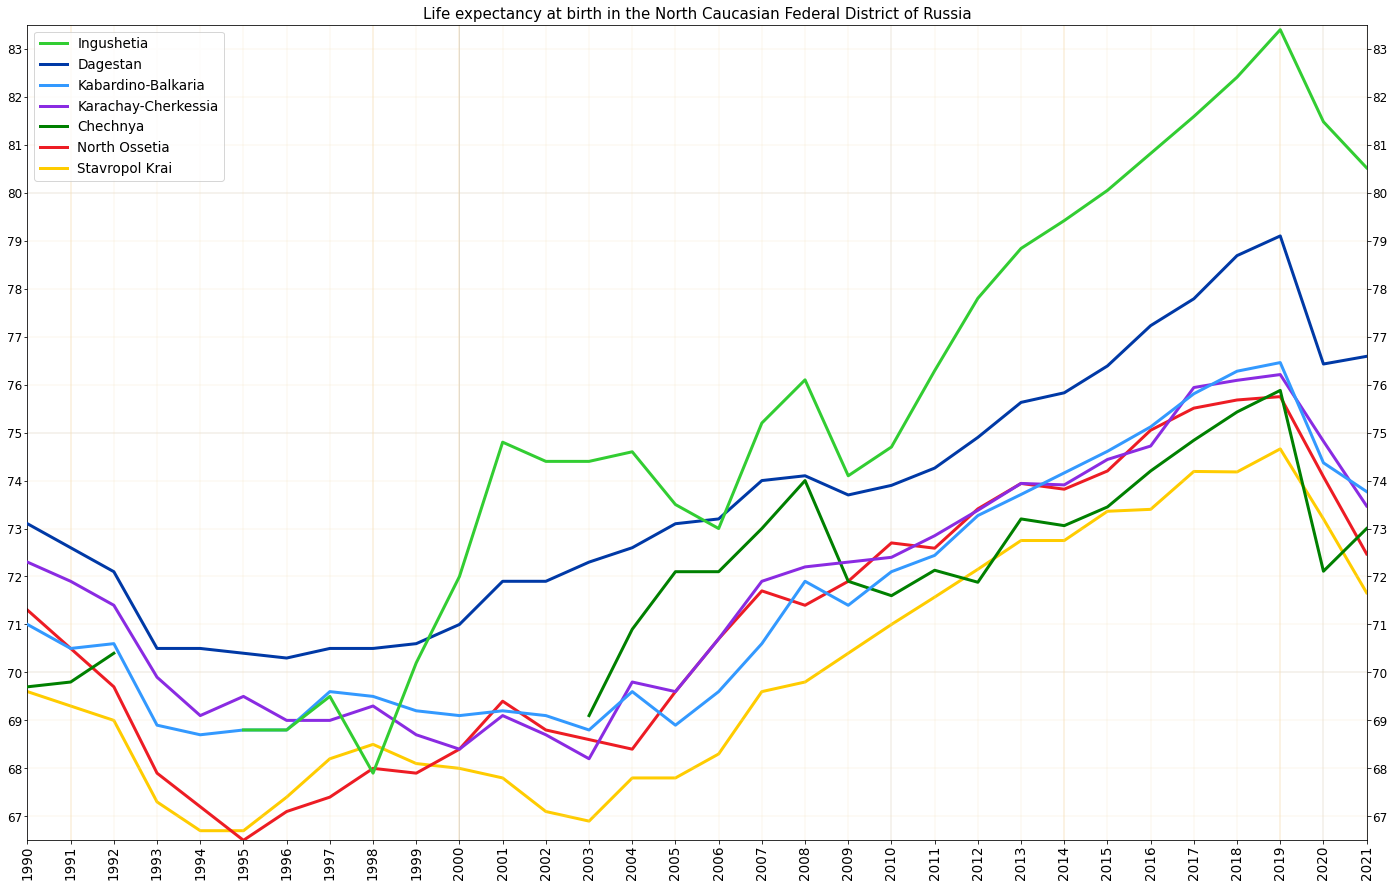

In [10]:
title = TitlePars(label='Life expectancy at birth in the North Caucasian Federal District of Russia', fontsize=15)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -NCFD.png')

<br />
<br />
<br />

Explore the [North Caucasus](https://en.wikipedia.org/wiki/North_Caucasus) ([Северный Кавказ](https://ru.wikipedia.org/wiki/Северный_Кавказ))

In [11]:
# Comparison subjects in the region of the North Caucasus
df = df_all.loc[['Дагестан',
                 'Ингушетия',
                 'Кабардино-Балкария',
                 'Карачаево-Черкесия',
                 'Северная Осетия',
                 'Чечня',
                 'Ставропольский край',
                 'Адыгея',
                 'Краснодарский край',
                 'Чеченская и Ингушская Республики']] \
    .sort_values(by=2021, ascending=False)

df.fillna('')

1990  1991  1992  1993  1994  1995  1996  \
Ингушетия                                                       68.8  68.8   
Дагестан                          73.1  72.6  72.1  70.5  70.5  70.4  70.3   
Кабардино-Балкария                71.0  70.5  70.6  68.9  68.7  68.8  68.8   
Карачаево-Черкесия                72.3  71.9  71.4  69.9  69.1  69.5  69.0   
Чечня                             69.7  69.8  70.4                           
Северная Осетия                   71.3  70.5  69.7  67.9  67.2  66.5  67.1   
Ставропольский край               69.6  69.3  69.0  67.3  66.7  66.7  67.4   
Адыгея                            69.8  68.3  68.5  66.9  66.7  66.9  67.6   
Краснодарский край                68.7  68.3  67.8  65.5  65.0  65.7  66.9   
Чеченская и Ингушская Республики  69.7  69.8  70.4                           

                                  1997  1998  1999  2000  2001  2002  2003  \
Ингушетия                         69.5  67.9  70.2  72.0  74.8  74.4  74.4   
Дагестан                          70.5  70.5  70.6  71.0  71.9  71.9  72.3   
Кабардино-Балкария                69.6  69.5  69.2  69.1  69.2  69.1  68.8   
Карачаево-Черкесия                69.0  69.3  68.7  68.4  69.1  68.7  68.2   
Чечня                                                                 69.1   
Северная Осетия                   67.4  68.0  67.9  68.4  69.4  68.8  68.6   
Ставропольский край               68.2  68.5  68.1  68.0  67.8  67.1  66.9   
Адыгея                            68.0  68.5  68.6  67.6  68.1  67.9  67.4   
Краснодарский край                67.5  68.0  67.7  67.1  67.2  67.0  67.2   
Чеченская и Ингушская Республики                                             

                                  2004  2005  2006  2007  2008  2009  2010  \
Ингушетия                         74.6  73.5  73.0  75.2  76.1  74.1  74.7   
Дагестан                          72.6  73.1  73.2  74.0  74.1  73.7  73.9   
Кабардино-Балкария                69.6  68.9  69.6  70.6  71.9  71.4  72.1   
Карачаево-Черкесия                69.8  69.6  70.7  71.9  72.2  72.3  72.4   
Чечня                             70.9  72.1  72.1  73.0  74.0  71.9  71.6   
Северная Осетия                   68.4  69.6  70.7  71.7  71.4  71.9  72.7   
Ставропольский край               67.8  67.8  68.3  69.6  69.8  70.4  71.0   
Адыгея                            67.8  68.1  68.3  68.8  68.6  69.9  70.0   
Краснодарский край                67.5  67.6  68.8  69.3  69.8  70.8  71.0   
Чеченская и Ингушская Республики                                             

                                   2011   2012   2013   2014   2015   2016  \
Ингушетия                         76.29   77.8  78.84  79.42  80.05  80.82   
Дагестан                          74.26   74.9  75.63  75.83  76.39  77.23   
Кабардино-Балкария                72.44  73.27  73.71  74.16  74.61  75.12   
Карачаево-Черкесия                72.85  73.38  73.94  73.91  74.44  74.72   
Чечня                             72.13  71.88   73.2  73.06  73.45   74.2   
Северная Осетия                   72.59  73.41  73.94  73.82   74.2  75.05   
Ставропольский край               71.57  72.15  72.75  72.75  73.36   73.4   
Адыгея                            70.99  71.68   71.8  72.01  72.22  72.59   
Краснодарский край                71.15  71.74  72.29  72.28  72.53  72.83   
Чеченская и Ингушская Республики                                             

                                   2017   2018   2019   2020   2021  
Ингушетия                         81.59  82.41   83.4  81.48  80.52  
Дагестан                          77.79  78.69   79.1  76.43  76.59  
Кабардино-Балкария                75.81  76.28  76.46  74.37  73.77  
Карачаево-Черкесия                75.94  76.09  76.21  74.82  73.47  
Чечня                             74.84  75.43  75.88  72.11   73.0  
Северная Осетия                   75.51  75.68  75.75  74.08  72.47  
Ставропольский край               74.19  74.18  74.66   73.2  71.66  
Адыгея                            73.2

min: 65.00, max: 83.40


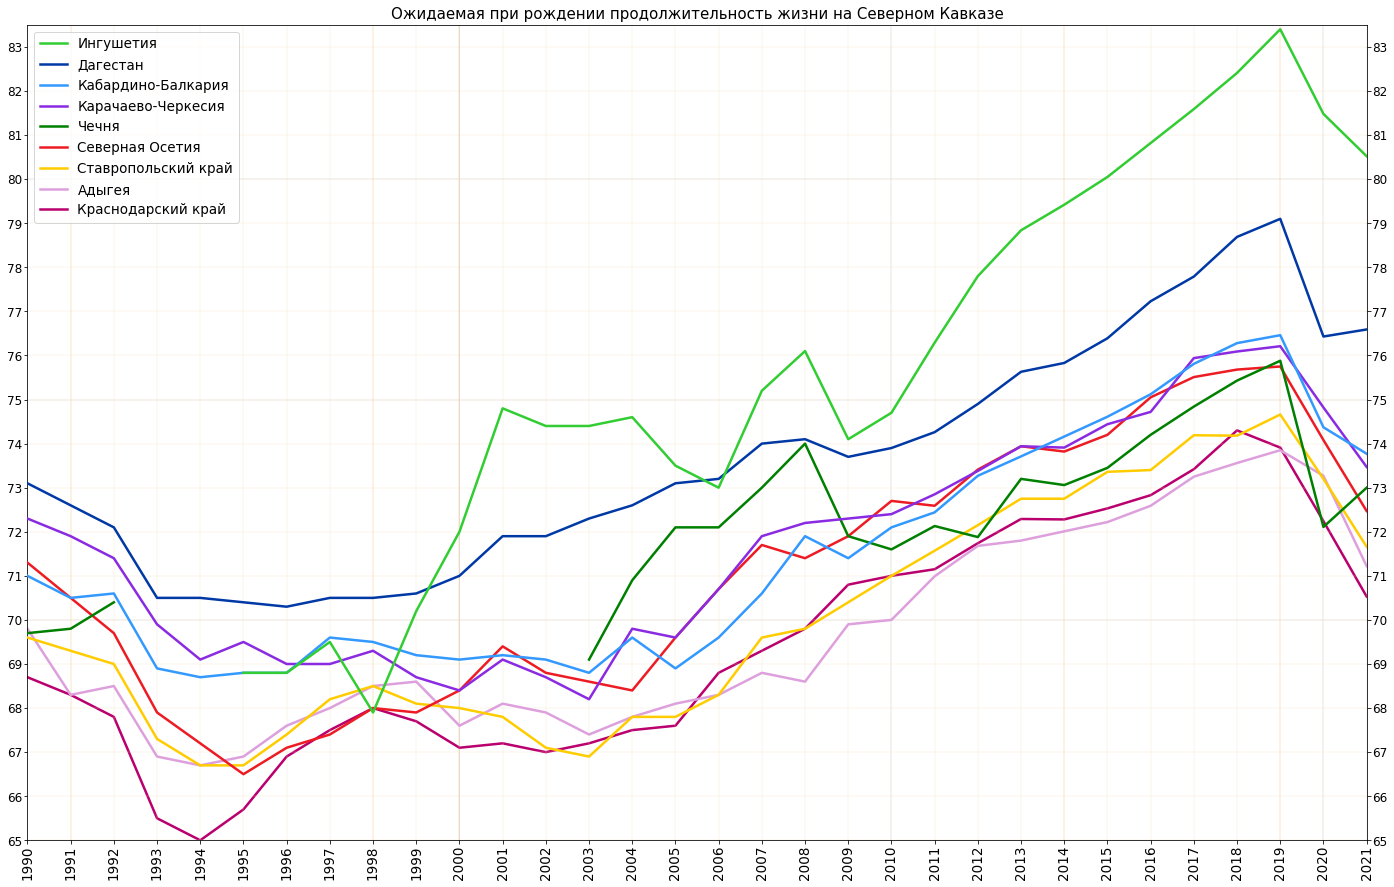

In [12]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни на Северном Кавказе', fontsize=15)

ls_subjects = {'Ингушетия': 'limegreen',
               'Дагестан': '#0039a6',
               'Кабардино-Балкария': '#3399ff',
               'Карачаево-Черкесия': 'blueviolet',
               'Чечня': 'green',
               'Северная Осетия': '#ed1c24',
               'Ставропольский край': '#ffcc00',
               'Адыгея': 'plum',
               'Краснодарский край': '#ba006e'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=65, up=83.5)
hor_lines = [1991, 1998, 2000, 2014, 2019]

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -North_Caucasus -ru.png')

min: 65.00, max: 83.40


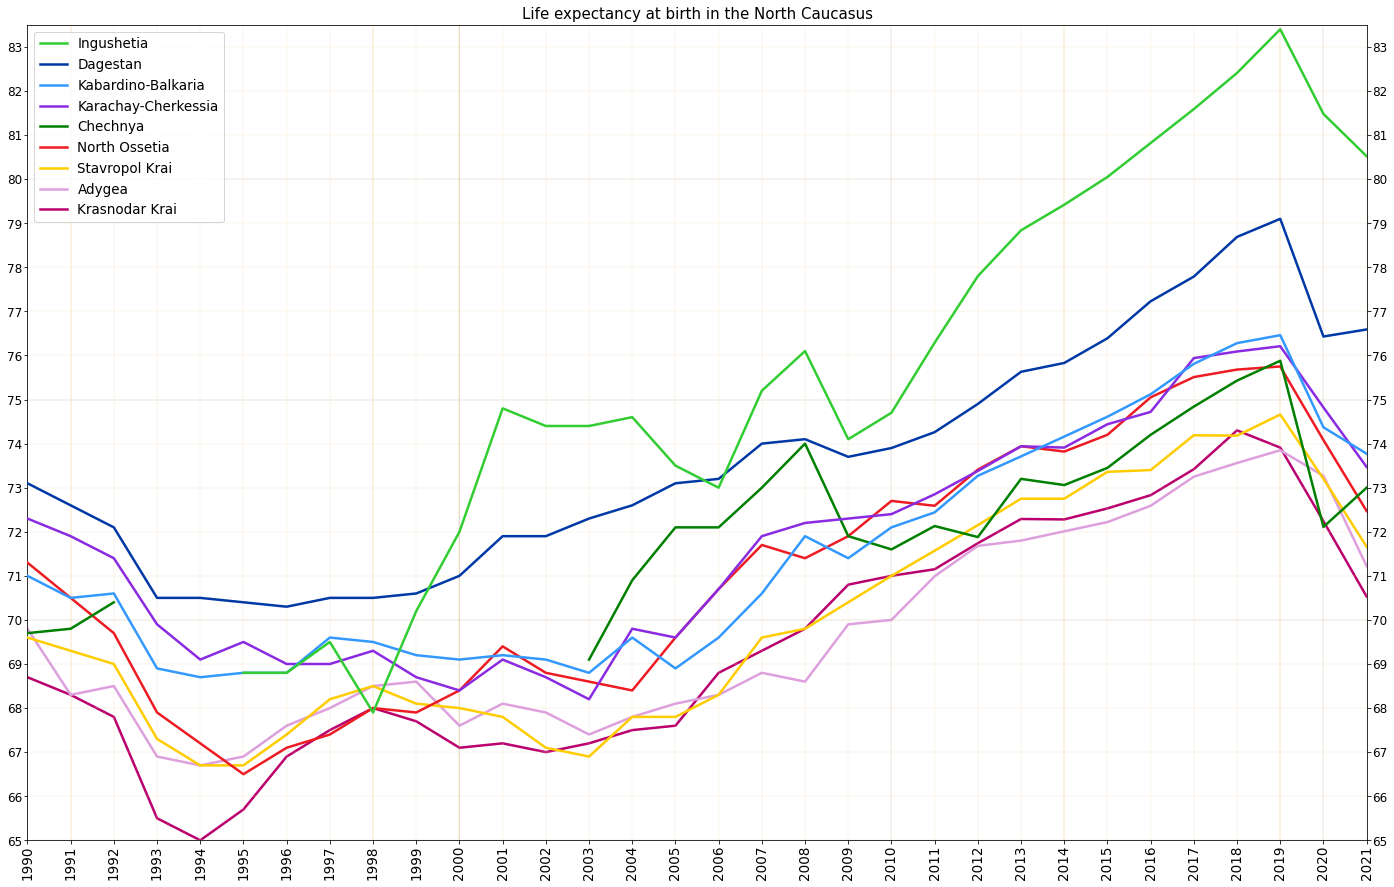

In [13]:
title = TitlePars(label='Life expectancy at birth in the North Caucasus', fontsize=15)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -North_Caucasus.png')

<br />
<br />
<br />

Explore the [Southern Federal District](https://en.wikipedia.org/wiki/Southern_Federal_District) ([Южный федеральный округ](https://ru.wikipedia.org/wiki/Южный_федеральный_округ))

In [14]:
# Comparison subjects of the Southern Federal District
df = df_all.loc[['Севастополь',
                 'Калмыкия',
                 'Адыгея',
                 'Краснодарский край',
                 'Волгоградская область',
                 'Астраханская область',
                 'Ростовская область',
                 'Республика Крым']] \
    .sort_values(by=2021, ascending=False)

df.fillna('')

1990  1991  1992  1993  1994  1995  1996  1997  1998  \
Севастополь                                                                   
Калмыкия               68.2  68.0  67.8  65.9  65.8  65.0  66.3  66.8  66.3   
Адыгея                 69.8  68.3  68.5  66.9  66.7  66.9  67.6  68.0  68.5   
Краснодарский край     68.7  68.3  67.8  65.5  65.0  65.7  66.9  67.5  68.0   
Волгоградская область  70.4  70.4  69.6  67.5  65.9  66.6  67.3  67.7  67.8   
Астраханская область   69.6  69.1  68.6  66.3  65.0  65.9  66.3  66.9  66.4   
Ростовская область     69.4  69.0  68.6  66.3  65.3  65.4  66.6  67.3  67.6   
Республика Крым                                                               

                       1999  2000  2001  2002  2003  2004  2005  2006  2007  \
Севастополь                                                                   
Калмыкия               65.9  65.4  66.3  65.1  65.9  67.5  67.2  67.9  68.7   
Адыгея                 68.6  67.6  68.1  67.9  67.4  67.8  68.1  68.3  68.8   
Краснодарский край     67.7  67.1  67.2  67.0  67.2  67.5  67.6  68.8  69.3   
Волгоградская область  66.3  66.4  66.1  66.3  66.2  66.9  67.0  67.9  68.9   
Астраханская область   65.9  65.3  65.0  64.9  65.1  65.7  65.4  66.8  67.7   
Ростовская область     66.9  66.5  66.5  66.5  66.3  66.8  67.0  67.7  68.5   
Республика Крым                                                               

                       2008  2009  2010   2011   2012   2013   2014   2015  \
Севастополь                                                   72.28  70.67   
Калмыкия               69.4  69.0  69.4   70.8  71.22  71.35  72.03  72.15   
Адыгея                 68.6  69.9  70.0  70.99  71.68   71.8  72.01  72.22   
Краснодарский край     69.8  70.8  71.0  71.15  71.74  72.29  72.28  72.53   
Волгоградская область  69.0  69.5  69.7   70.5  70.99  71.42  71.62  71.98   
Астраханская область   68.6  68.9  69.1  69.84  70.36  71.34  70.76  71.36   
Ростовская область     69.0  69.6  69.7  70.28  71.02  71.39  71.30  71.90   
Республика Крым                                               70.74  70.52   

                        2016   2017   2018   2019   2020   2021  
Севастополь            71.64  73.37  73.63  73.53  73.58  72.25  
Калмыкия               73.35  73.54  73.84  74.84  72.93  71.40  
Адыгея                 72.59  73.25  73.56  73.85  73.27  71.22  
Краснодарский край     72.83  73.42  74.30  73.91  72.24  70.53  
Волгоградская область  72.49  73.54  73.47  74.07  71.98  69.96  
Астраханская область   72.20  73.35  73.48  73.86  72.01  69.90  
Ростовская область     72.20  73.03  73.21  73.69  72.04  69.79  
Республика Крым        70.74  72.00  72.22  72.71  71.20  69.70

min: 64.90, max: 74.84


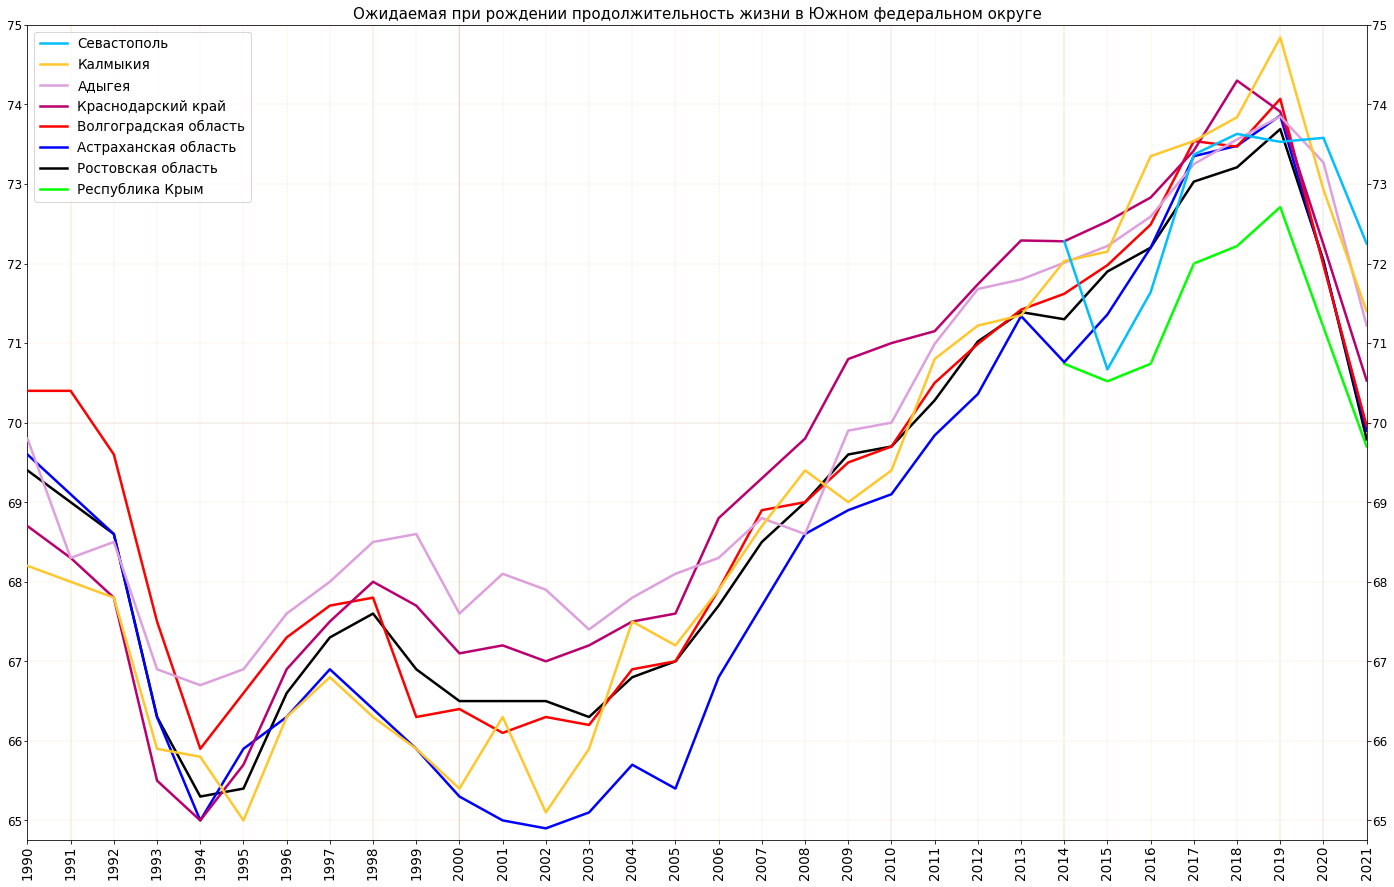

In [15]:
# Comparison subjects of the Southern Federal District
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Южном федеральном округе', fontsize=15)

ls_subjects = {'Севастополь': 'deepskyblue',
               'Калмыкия': '#ffc72c',
               'Адыгея': 'plum',
               'Краснодарский край': '#ba006e',
               'Волгоградская область': '#fe0000',
               'Астраханская область': 'blue',
               'Ростовская область': 'black',
               'Республика Крым': 'lime'}
figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=64.75, up=75)
hor_lines = [1991, 1998, 2000, 2014, 2019]

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -SFD -ru.png')

min: 64.90, max: 74.84


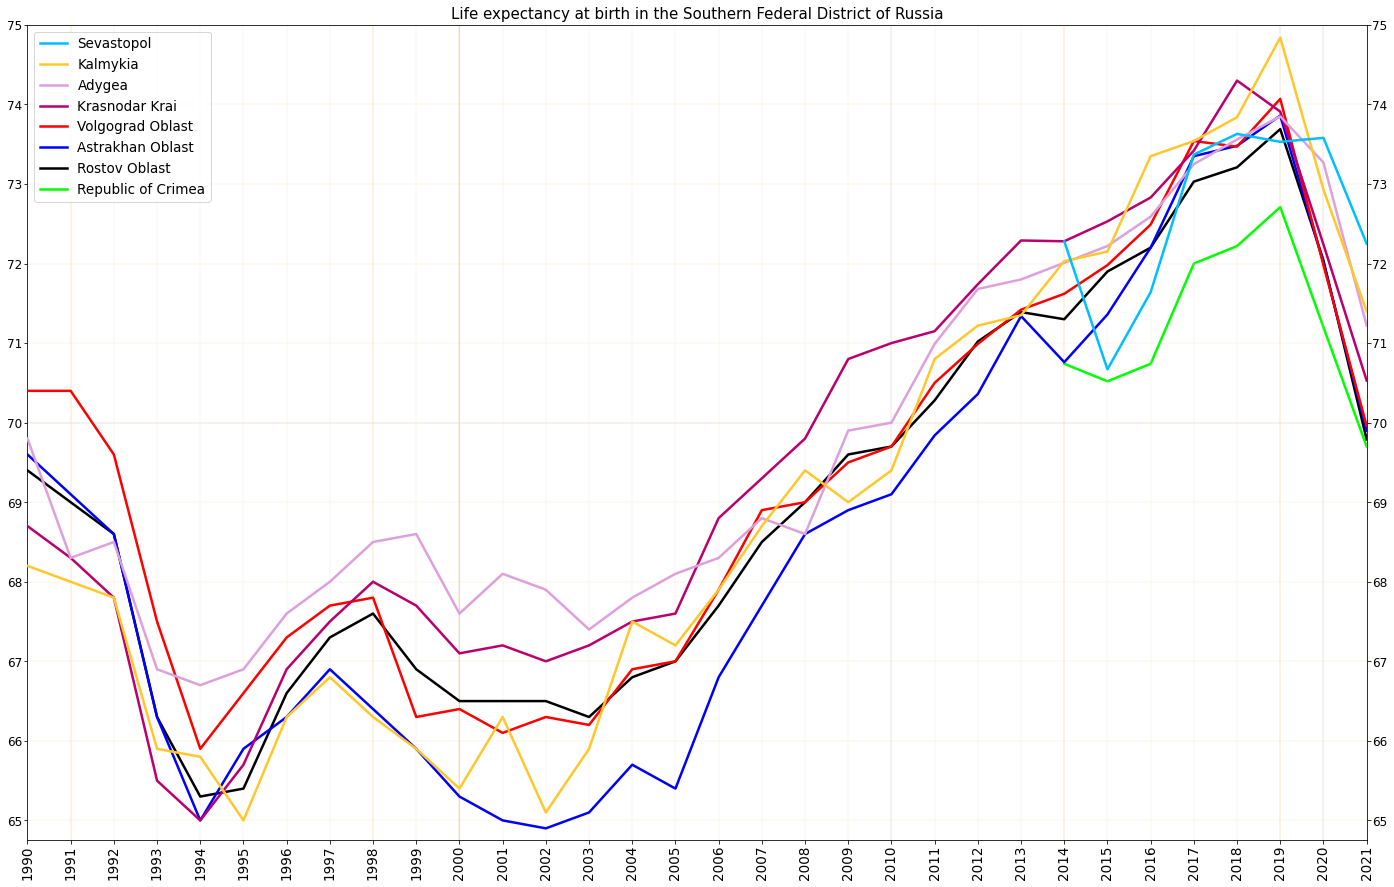

In [16]:
title = TitlePars(label='Life expectancy at birth in the Southern Federal District of Russia', fontsize=15)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -SFD.png') 

<br />
<br />
<br />

Explore region around [Republic of Crimea](https://en.wikipedia.org/wiki/Republic_of_Crimea) and [Sevastopol](https://ru.wikipedia.org/wiki/Sevastopol)

In [17]:
# # Comparison Crimea with its neighbors
# df = df_all.loc[['Севастополь',
#                  'Адыгея',
#                  'Краснодарский край',
#                  'Ростовская область',
#                  'Республика Крым']] \
#     .sort_values(by=2021, ascending=False)

# df.loc[:, 2014:2021]

In [18]:
# title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Крыму и соседних с ним регионах', fontsize=15)

# ls_subjects = {'Севастополь': 'deepskyblue',
#                'Адыгея': 'plum',
#                'Краснодарский край': '#ba006e',
#                'Ростовская область': 'black',
#                'Республика Крым': 'lime'}

# figure_size=(15, 10)
# legend = LagendPars(loc='upper left', fontsize=13.5)
# chart_lim = ChartLim(bottom=69.5, up=74.5)

# create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang='ru',
#              xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal',
#              destination='show', file_name='Life expectancy in Russia -Crimea -ru.png')

<br />
<br />
<br />

In [19]:
# # Comparison Crimea with its neighbors
# title = TitlePars(label='Life expectancy at birth in Crimea and neighboring regions', fontsize=15)

# create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang='en',
#              xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal',
#              destination='show', file_name='Life expectancy in Russia -Crimea.png')

Just for interest, explore cases with smaller number of neighbors

In [20]:
# # Comparison Crimea with its neighbors (2)
# title = TitlePars(label='Life expectancy at birth in the South Federal District of Russia', fontsize=15)

# ls_subjects = {'Севастополь': 'deepskyblue',
#                'Краснодарский край': '#ba006e',
#                'Ростовская область': 'black',
#                'Республика Крым': 'lime'}

# figure_size=(15, 10)
# legend = LagendPars(loc='upper left', fontsize=13.5)
# chart_lim = ChartLim(bottom=69.5, up=74.5)

# create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
#              xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal', destination='here')

In [21]:
# # Comparison Crimea with its neighbors (3)
# title = TitlePars(label='Life expectancy at birth in the South Federal District of Russia', fontsize=15)

# ls_subjects = {'Севастополь': 'deepskyblue',
#                'Краснодарский край': '#ba006e',
#                'Республика Крым': 'lime'}

# figure_size=(15, 10)
# legend = LagendPars(loc='upper left', fontsize=13.5)
# chart_lim = ChartLim(bottom=69.5, up=74.5)

# create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
#              xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal', destination='here')

In [22]:
# # Comparison Crimea with its neighbors (4)
# title = TitlePars(label='Life expectancy at birth in the South Federal District of Russia', fontsize=15)

# ls_subjects = {'Севастополь': 'deepskyblue',
#                'Республика Крым': 'lime'}

# figure_size=(15, 10)
# legend = LagendPars(loc='upper left', fontsize=13.5)
# chart_lim = ChartLim(bottom=69.5, up=74)

# create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
#              xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal', destination='here')

<br />

---

##### Calculate and handle data about Crimea in general

In [23]:
df_all.tail().fillna('')

1990  1991  1992  1993  1994  1995  1996  \
Чукотка                           68.0  67.2  64.2  60.5  60.8  59.8  58.4   
Чеченская и Ингушская Республики  69.7  69.8  70.4                           
Сибирский ФО                      67.9  67.7  66.3  63.2  61.8  62.8  63.7   
Дальневосточный ФО                67.2  66.9  65.3  62.5  61.7  61.8  62.9   
Южный ФО                                                                     

                                  1997  1998  1999  2000  2001  2002  2003  \
Чукотка                           61.6  60.3  61.6  60.2  55.3  58.0  59.1   
Чеченская и Ингушская Республики                                             
Сибирский ФО                      64.7  65.4  64.1  63.7  63.6  63.1  62.8   
Дальневосточный ФО                64.2  64.6  63.8  63.2  62.8  62.6  62.3   
Южный ФО                                                              66.6   

                                  2004  2005  2006  2007  2008  2009  2010  \
Чукотка                           57.7  58.5  59.6  59.4  60.3  58.8  57.5   
Чеченская и Ингушская Республики                                             
Сибирский ФО                      63.2  62.7  64.6  65.7  66.1  66.9  67.1   
Дальневосточный ФО                62.3  62.2  63.8  64.8  64.9  65.7  65.8   
Южный ФО                          67.1  67.1  68.1  68.8  69.3  70.0  70.1   

                                   2011   2012   2013   2014   2015   2016  \
Чукотка                           61.58  60.79  62.11  62.32  64.16  64.42   
Чеченская и Ингушская Республики                                             
Сибирский ФО                      67.72  67.99  68.63  68.85  69.31  69.81   
Дальневосточный ФО                66.36   67.0  67.81  68.21  68.68  69.22   
Южный ФО                          70.65  71.26  71.76  71.74  72.13  72.29   

                                   2017   2018   2019   2020   2021  
Чукотка                            66.1  63.58  68.09  65.82  64.87  
Чеченская и Ингушская Республики                                     
Сибирский ФО                       70.5  70.73  71.12   69.6   68.3  
Дальневосточный ФО                70.09   70.2  70.22  69.15  68.06  
Южный ФО                          73.16  73.54  73.73  72.09  70.21

In [24]:
popl = pd.read_csv('data/population_Crimea.csv', sep='\t')
columns = popl.columns.to_list()
popl.columns = columns[:2] + [int(year) for year in columns[2:]]
popl

region     location     2014     2015     2016     2017     2018  \
0  Республика Крым  все_локации  1884400  1901500  1909600  1912950  1912775   
1  Республика Крым        город   956300   965400   971100   974139   974835   
2  Республика Крым         село   928100   936100   938500   938811   937940   
3      Севастополь  все_локации   386500   407600   422500   432712   439941   
4      Севастополь        город   356600   377200   391900   402023   409269   
5      Севастополь         село    29900    30400    30600    30689    30672   

      2019     2020     2021  
0  1912220  1907100  1898985  
1   975045   970720   964191  
2   937175   936380   934794  
3   446175   479565   516025  
4   415668   449084   485636  
5    30507    30481    30389

In [25]:
le_1 = df_all.loc['Республика Крым', 2014:]
le_1.name = 'le_1'

le_2 = df_all.loc['Севастополь', 2014:]
le_2.name = 'le_2'

popl_1 = popl.loc[(popl['region'] == 'Республика Крым') & (popl['location'] == 'все_локации')].loc[:, 2014:].iloc[0]
popl_1.name = 'popl_1'

popl_2 = popl.loc[(popl['region'] == 'Севастополь') & (popl['location'] == 'все_локации')].loc[:, 2014:].iloc[0]
popl_2.name = 'popl_2'

df = pd.concat([le_1, popl_1, le_2, popl_2], axis='columns')

ser_crimea = (df.le_1 * df.popl_1 + df.le_2 * df.popl_2) / (df.popl_1 + df.popl_2)
ser_crimea.name = 'Крым'

df_all = df_all.append(ser_crimea)
df_all.tail().fillna('')

1990  1991  1992  1993  1994  1995  1996  \
Чеченская и Ингушская Республики  69.7  69.8  70.4                           
Сибирский ФО                      67.9  67.7  66.3  63.2  61.8  62.8  63.7   
Дальневосточный ФО                67.2  66.9  65.3  62.5  61.7  61.8  62.9   
Южный ФО                                                                     
Крым                                                                         

                                  1997  1998  1999  2000  2001  2002  2003  \
Чеченская и Ингушская Республики                                             
Сибирский ФО                      64.7  65.4  64.1  63.7  63.6  63.1  62.8   
Дальневосточный ФО                64.2  64.6  63.8  63.2  62.8  62.6  62.3   
Южный ФО                                                              66.6   
Крым                                                                         

                                  2004  2005  2006  2007  2008  2009  2010  \
Чеченская и Ингушская Республики                                             
Сибирский ФО                      63.2  62.7  64.6  65.7  66.1  66.9  67.1   
Дальневосточный ФО                62.3  62.2  63.8  64.8  64.9  65.7  65.8   
Южный ФО                          67.1  67.1  68.1  68.8  69.3  70.0  70.1   
Крым                                                                         

                                   2011   2012   2013       2014       2015  \
Чеченская и Ингушская Республики                                              
Сибирский ФО                      67.72  67.99  68.63      68.85      69.31   
Дальневосточный ФО                66.36   67.0  67.81      68.21      68.68   
Южный ФО                          70.65  71.26  71.76      71.74      72.13   
Крым                                                   71.002103  70.546478   

                                      2016       2017      2018       2019  \
Чеченская и Ингушская Республики                                             
Сибирский ФО                         69.81       70.5     70.73      71.12   
Дальневосточный ФО                   69.22      70.09      70.2      70.22   
Южный ФО                             72.29      73.16     73.54      73.73   
Крым                              70.90305  72.252728  72.48366  72.865132   

                                       2020       2021  
Чеченская и Ингушская Республики                        
Сибирский ФО                           69.6       68.3  
Дальневосточный ФО                    69.15      68.06  
Южный ФО                              72.09      70.21  
Крым                              71.678226  70.244869

In [26]:
# # Comparison Crimea with its neighbors
# df = df_all.loc[['Севастополь',
#                  'Крым',
#                  'Республика Крым']] \
#     .sort_values(by=2021, ascending=False)

# df.loc[:, 2014:2021]

In [27]:
# title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Крыму', fontsize=15)

# ls_subjects = {'Севастополь': 'deepskyblue',
#                'Крым': 'cornflowerblue',
#                'Республика Крым': 'lime'}

# figure_size=(15, 10)
# legend = LagendPars(loc='upper left', fontsize=13.5)
# chart_lim = ChartLim(bottom=69.5, up=74)

# create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, linestyles=['--', '-', '-.'], lang='ru',
#              xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal', destination='show', file_name='Life expectancy in Russia -Crimea (v2) -ru.png')

<br />
<br />

In [28]:
# Comparison Crimea with its neighbors
df = df_all.loc[['Севастополь',
                 'Адыгея',
                 'Краснодарский край',
                 'Крым',
                 'Ростовская область',
                 'Республика Крым']] \
    .sort_values(by=2021, ascending=False)

df.loc[:, 2014:]

2014       2015      2016       2017      2018  \
Севастополь         72.280000  70.670000  71.64000  73.370000  73.63000   
Адыгея              72.010000  72.220000  72.59000  73.250000  73.56000   
Краснодарский край  72.280000  72.530000  72.83000  73.420000  74.30000   
Крым                71.002103  70.546478  70.90305  72.252728  72.48366   
Ростовская область  71.300000  71.900000  72.20000  73.030000  73.21000   
Республика Крым     70.740000  70.520000  70.74000  72.000000  72.22000   

                         2019       2020       2021  
Севастополь         73.530000  73.580000  72.250000  
Адыгея              73.850000  73.270000  71.220000  
Краснодарский край  73.910000  72.240000  70.530000  
Крым                72.865132  71.678226  70.244869  
Ростовская область  73.690000  72.040000  69.790000  
Республика Крым     72.710000  71.200000  69.700000

min: 69.70, max: 74.30


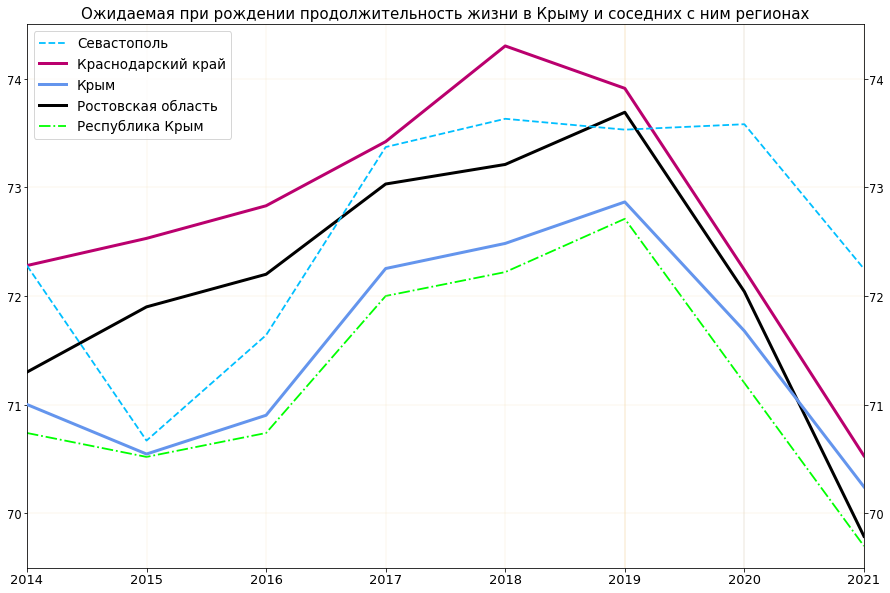

In [29]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Крыму и соседних с ним регионах', fontsize=15)

ls_subjects = {'Севастополь': 'deepskyblue',
               'Краснодарский край': '#ba006e',
               'Крым': 'cornflowerblue',
               'Ростовская область': 'black',
               'Республика Крым': 'lime'}

figure_size=(15, 10)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=69.5, up=74.5)
hor_lines = [2019]

create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
             linestyles=['--', '-', '-', '-', '-.'], hor_lines=hor_lines, lang='ru', xticks_size=13, yticks_size=11.5, label_x_rotation='horizontal',
             destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Crimea -ru.png')

min: 69.70, max: 74.30


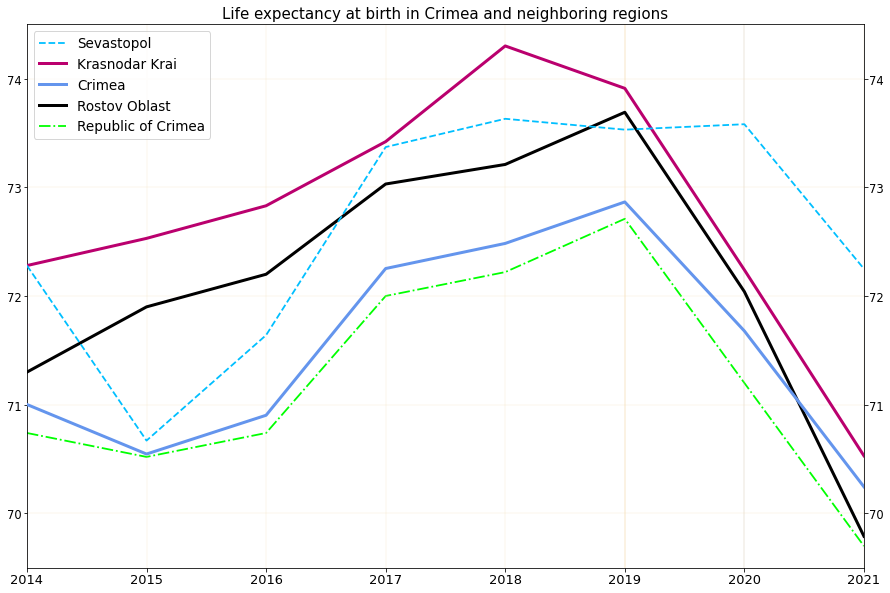

In [30]:
title = TitlePars(label='Life expectancy at birth in Crimea and neighboring regions', fontsize=15)

create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
             linestyles=['--', '-', '-', '-', '-.'], hor_lines=hor_lines, lang='en', xticks_size=13, yticks_size=11.5, label_x_rotation='horizontal',
             destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Crimea.png')

<br />
<br />
<br />

Explore region around [Krasnodar Krai](https://en.wikipedia.org/wiki/Krasnodar_Krai)

In [31]:
# Comparison Krasnodar with its neighbors
df = df_all.loc[['Карачаево-Черкесия',
                 'Севастополь',
                 'Ставропольский край',
                 'Адыгея',
                 'Краснодарский край',
                 'Крым',
                 'Ростовская область',
                 'Республика Крым']] \
    .sort_values(by=2021, ascending=False)

df.loc[:, 2014:]

2014       2015      2016       2017      2018  \
Карачаево-Черкесия   73.910000  74.440000  74.72000  75.940000  76.09000   
Севастополь          72.280000  70.670000  71.64000  73.370000  73.63000   
Ставропольский край  72.750000  73.360000  73.40000  74.190000  74.18000   
Адыгея               72.010000  72.220000  72.59000  73.250000  73.56000   
Краснодарский край   72.280000  72.530000  72.83000  73.420000  74.30000   
Крым                 71.002103  70.546478  70.90305  72.252728  72.48366   
Ростовская область   71.300000  71.900000  72.20000  73.030000  73.21000   
Республика Крым      70.740000  70.520000  70.74000  72.000000  72.22000   

                          2019       2020       2021  
Карачаево-Черкесия   76.210000  74.820000  73.470000  
Севастополь          73.530000  73.580000  72.250000  
Ставропольский край  74.660000  73.200000  71.660000  
Адыгея               73.850000  73.270000  71.220000  
Краснодарский край   73.910000  72.240000  70.530000  
Крым                 72.865132  71.678226  70.244869  
Ростовская область   73.690000  72.040000  69.790000  
Республика Крым      72.710000  71.200000  69.700000

min: 65.00, max: 76.21


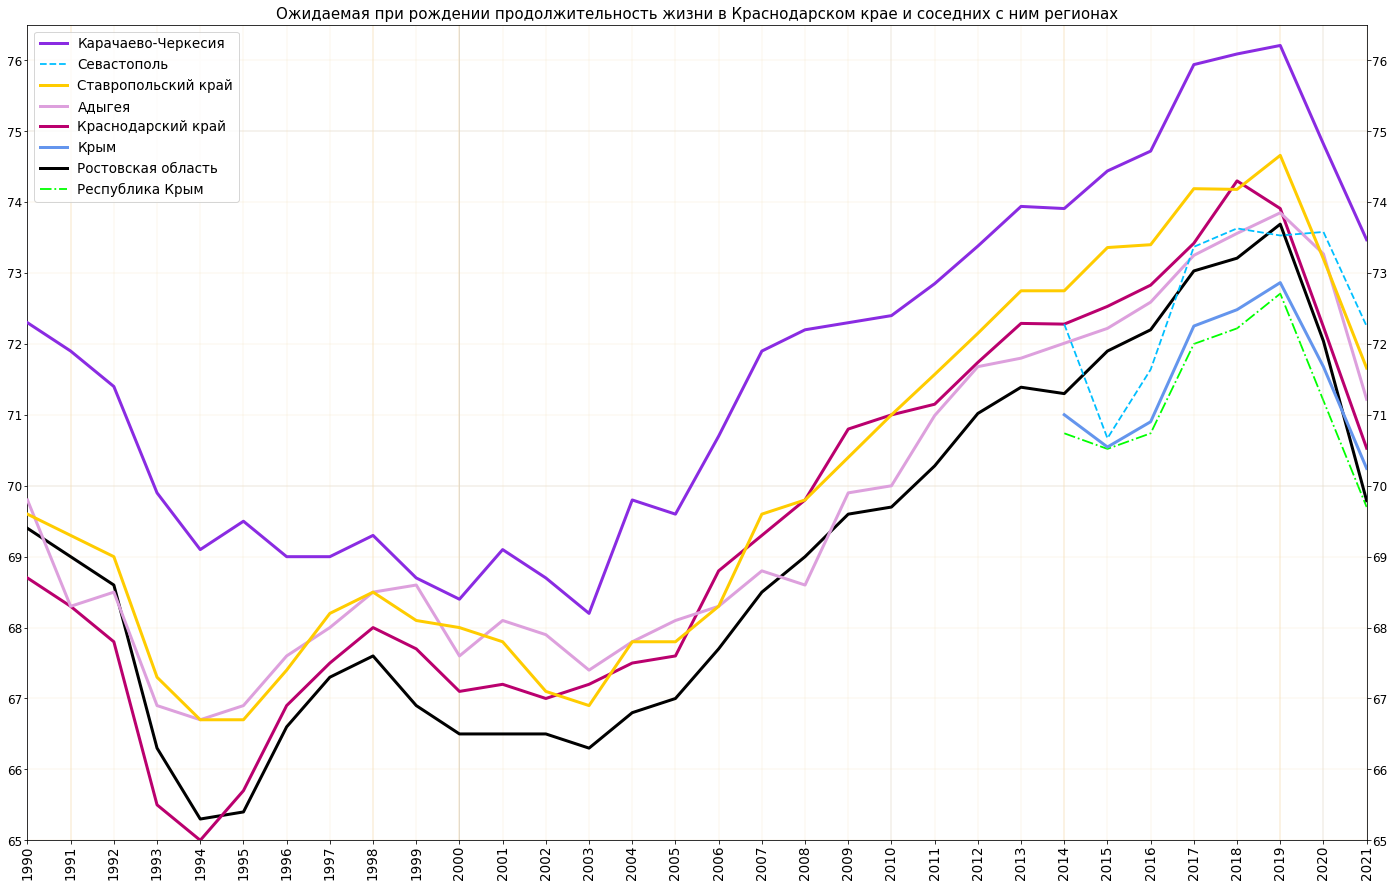

In [32]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Краснодарском крае и соседних с ним регионах', fontsize=15)

ls_subjects = {'Карачаево-Черкесия': 'blueviolet',
               'Севастополь': 'deepskyblue',
               'Ставропольский край': '#ffcc00',
               'Адыгея': 'plum',
               'Краснодарский край': '#ba006e',
               'Крым': 'cornflowerblue',
               'Ростовская область': 'black',
               'Республика Крым': 'lime'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=65, up=76.5)
hor_lines = [1991, 1998, 2000, 2014, 2019]

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
             linestyles=['-', '--', '-', '-', '-', '-', '-', '-.'], hor_lines=hor_lines, lang='ru', xticks_size=13.5, yticks_size=12,
             destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Krasnodar_Krai -ru.png')

min: 65.00, max: 76.21


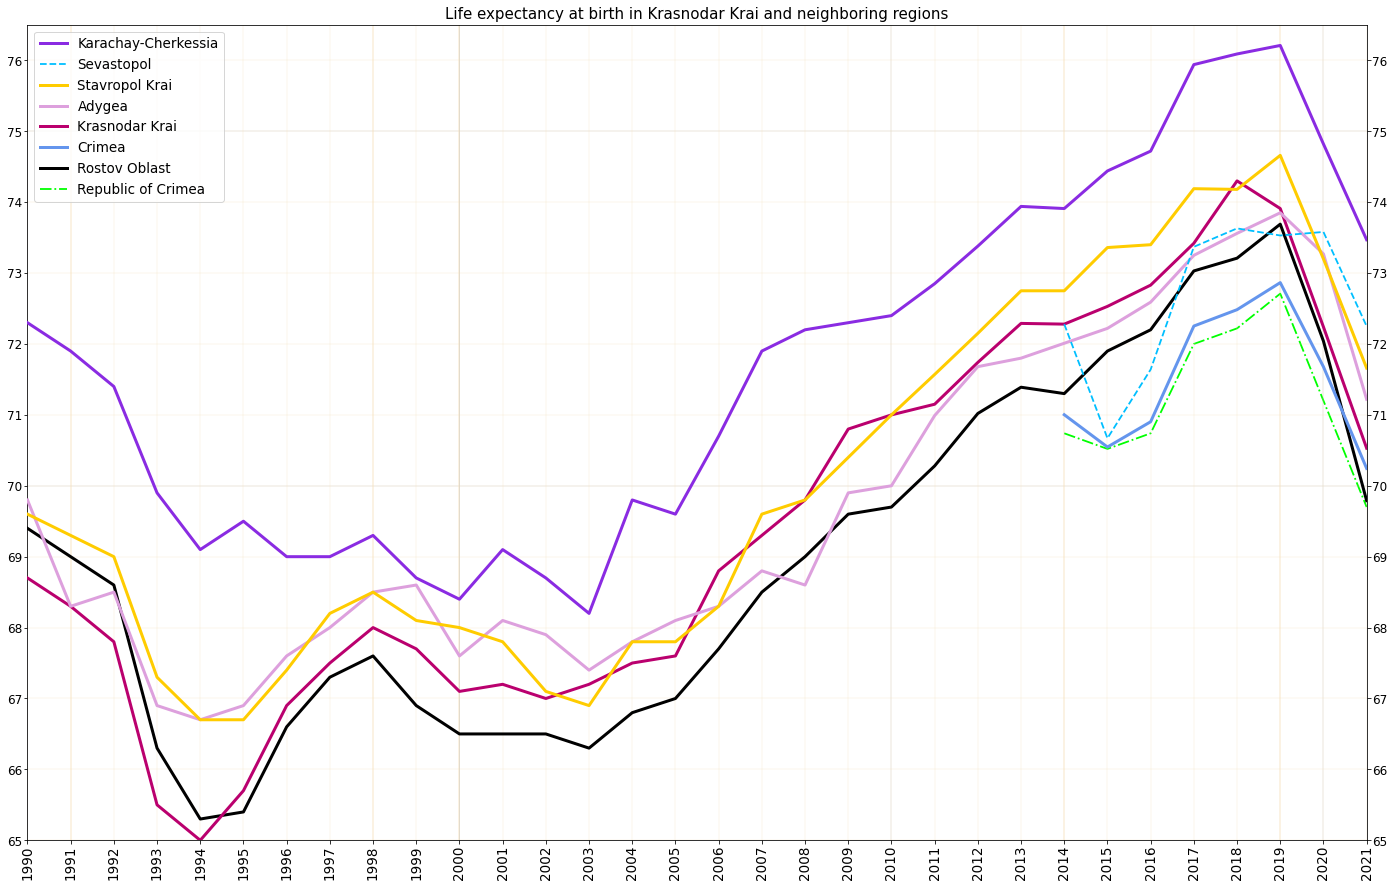

In [33]:
title = TitlePars(label='Life expectancy at birth in Krasnodar Krai and neighboring regions', fontsize=15)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
             linestyles=['-', '--', '-', '-', '-', '-', '-', '-.'], hor_lines=hor_lines, lang='en', xticks_size=13.5, yticks_size=12,
             destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Krasnodar_Krai.png')

<br />

min: 69.70, max: 76.21


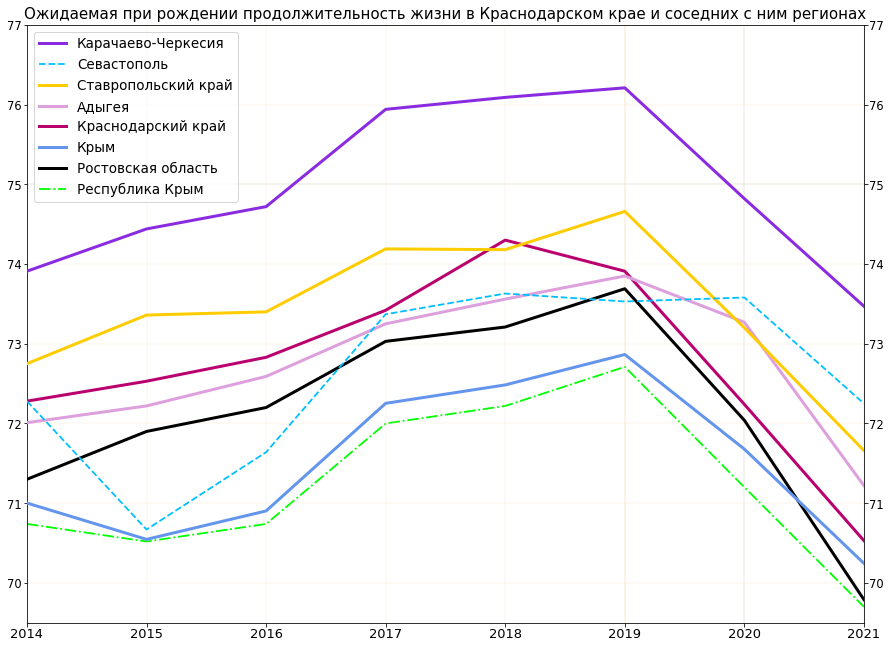

In [34]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Краснодарском крае и соседних с ним регионах', fontsize=15)

ls_subjects = {'Карачаево-Черкесия': 'blueviolet',
               'Севастополь': 'deepskyblue',
               'Ставропольский край': '#ffcc00',
               'Адыгея': 'plum',
               'Краснодарский край': '#ba006e',
               'Крым': 'cornflowerblue',
               'Ростовская область': 'black',
               'Республика Крым': 'lime'}

figure_size=(15, 11)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=69.5, up=77)
hor_lines = [2019]

create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
             linestyles=['-', '--', '-', '-', '-', '-', '-', '-.'], hor_lines=hor_lines,  lang='ru', xticks_size=13, yticks_size=11.5,
             label_x_rotation='horizontal', destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Krasnodar_Krai (after 2014) -ru.png')

min: 69.70, max: 76.21


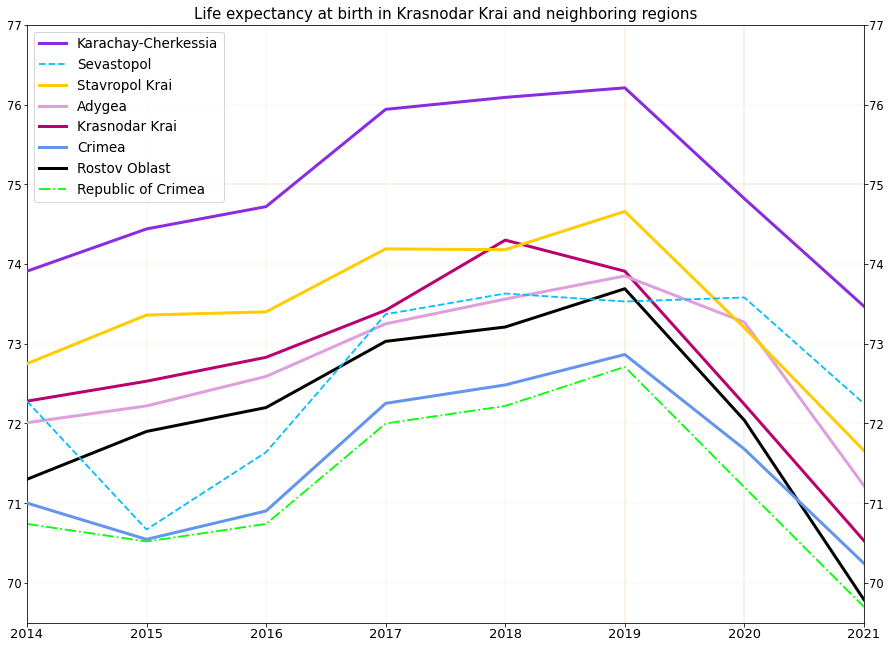

In [35]:
title = TitlePars(label='Life expectancy at birth in Krasnodar Krai and neighboring regions', fontsize=15)

figure_size=(15, 11)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=69.5, up=77)

create_chart(df_all.loc[:, 2014:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim,
             linestyles=['-', '--', '-', '-', '-', '-', '-', '-.'], hor_lines=hor_lines, lang='en', xticks_size=13, yticks_size=11.5,
             label_x_rotation='horizontal', destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Krasnodar_Krai (after 2014).png')

<br />
<br />
<br />

Explore region around [North Ossetia–Alania](https://en.wikipedia.org/wiki/North_Ossetia–Alania)

In [36]:
# Comparison subjects in the region of the North Caucasus
df = df_all.loc[['Ингушетия',
                 'Кабардино-Балкария',
                 'Чечня',
                 'Северная Осетия',
                 'Ставропольский край']] \
    .sort_values(by=2021, ascending=False)

df.fillna('')

1990  1991  1992  1993  1994  1995  1996  1997  1998  \
Ингушетия                                          68.8  68.8  69.5  67.9   
Кабардино-Балкария   71.0  70.5  70.6  68.9  68.7  68.8  68.8  69.6  69.5   
Чечня                69.7  69.8  70.4                                       
Северная Осетия      71.3  70.5  69.7  67.9  67.2  66.5  67.1  67.4  68.0   
Ставропольский край  69.6  69.3  69.0  67.3  66.7  66.7  67.4  68.2  68.5   

                     1999  2000  2001  2002  2003  2004  2005  2006  2007  \
Ингушетия            70.2  72.0  74.8  74.4  74.4  74.6  73.5  73.0  75.2   
Кабардино-Балкария   69.2  69.1  69.2  69.1  68.8  69.6  68.9  69.6  70.6   
Чечня                                        69.1  70.9  72.1  72.1  73.0   
Северная Осетия      67.9  68.4  69.4  68.8  68.6  68.4  69.6  70.7  71.7   
Ставропольский край  68.1  68.0  67.8  67.1  66.9  67.8  67.8  68.3  69.6   

                     2008  2009  2010   2011   2012   2013   2014   2015  \
Ингушетия            76.1  74.1  74.7  76.29  77.80  78.84  79.42  80.05   
Кабардино-Балкария   71.9  71.4  72.1  72.44  73.27  73.71  74.16  74.61   
Чечня                74.0  71.9  71.6  72.13  71.88  73.20  73.06  73.45   
Северная Осетия      71.4  71.9  72.7  72.59  73.41  73.94  73.82  74.20   
Ставропольский край  69.8  70.4  71.0  71.57  72.15  72.75  72.75  73.36   

                      2016   2017   2018   2019   2020   2021  
Ингушетия            80.82  81.59  82.41  83.40  81.48  80.52  
Кабардино-Балкария   75.12  75.81  76.28  76.46  74.37  73.77  
Чечня                74.20  74.84  75.43  75.88  72.11  73.00  
Северная Осетия      75.05  75.51  75.68  75.75  74.08  72.47  
Ставропольский край  73.40  74.19  74.18  74.66  73.20  71.66

min: 66.50, max: 83.40


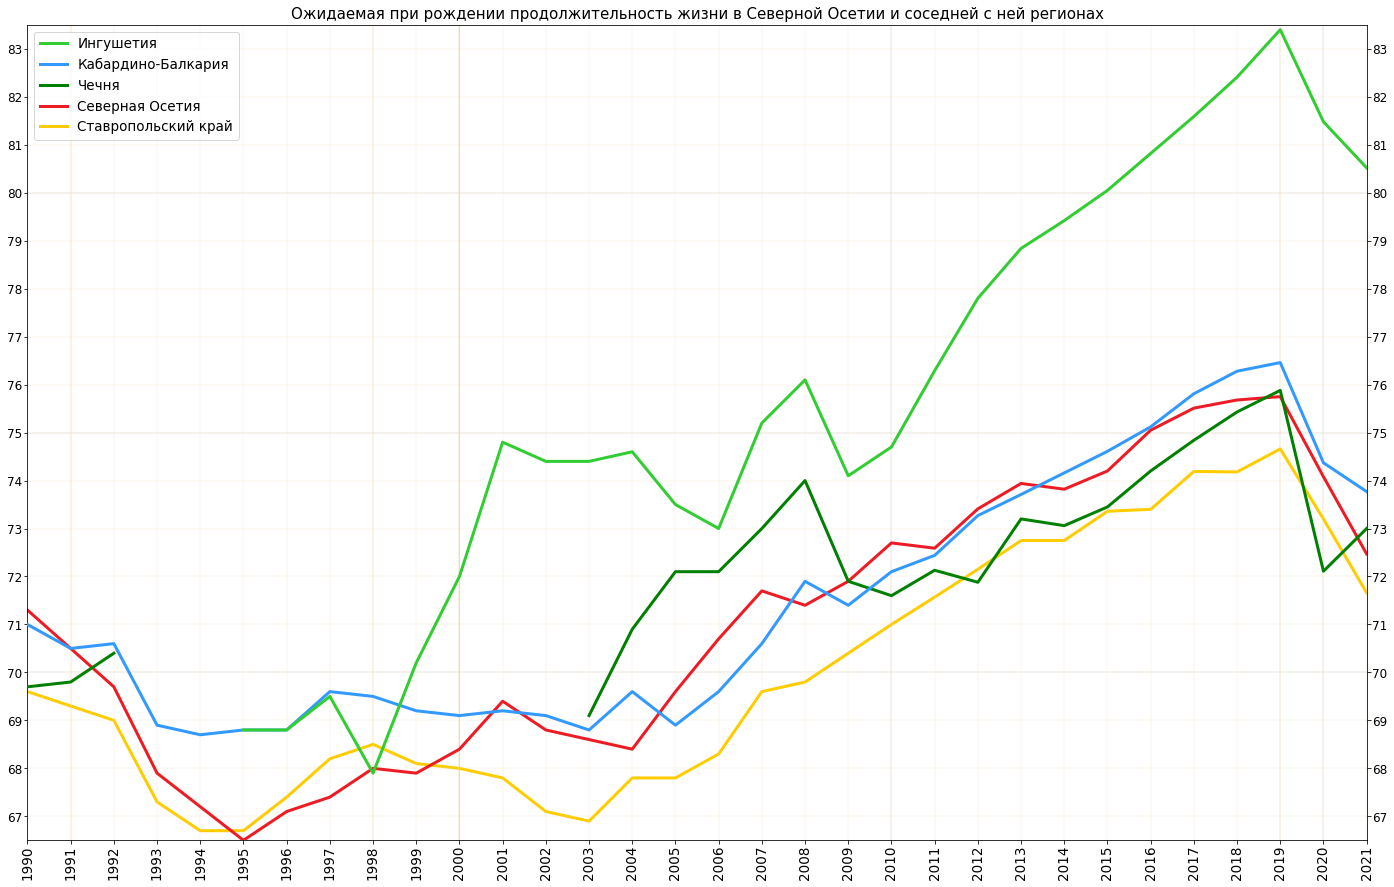

In [37]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Северной Осетии и соседней с ней регионах', fontsize=15)

ls_subjects = {'Ингушетия': 'limegreen',
               'Кабардино-Балкария': '#3399ff',
               'Чечня': 'green',
               'Северная Осетия': '#ed1c24',
               'Ставропольский край': '#ffcc00'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=66.5, up=83.5)
hor_lines = [1991, 1998, 2000, 2019]

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -North_Ossetia -ru.png')

min: 66.50, max: 83.40


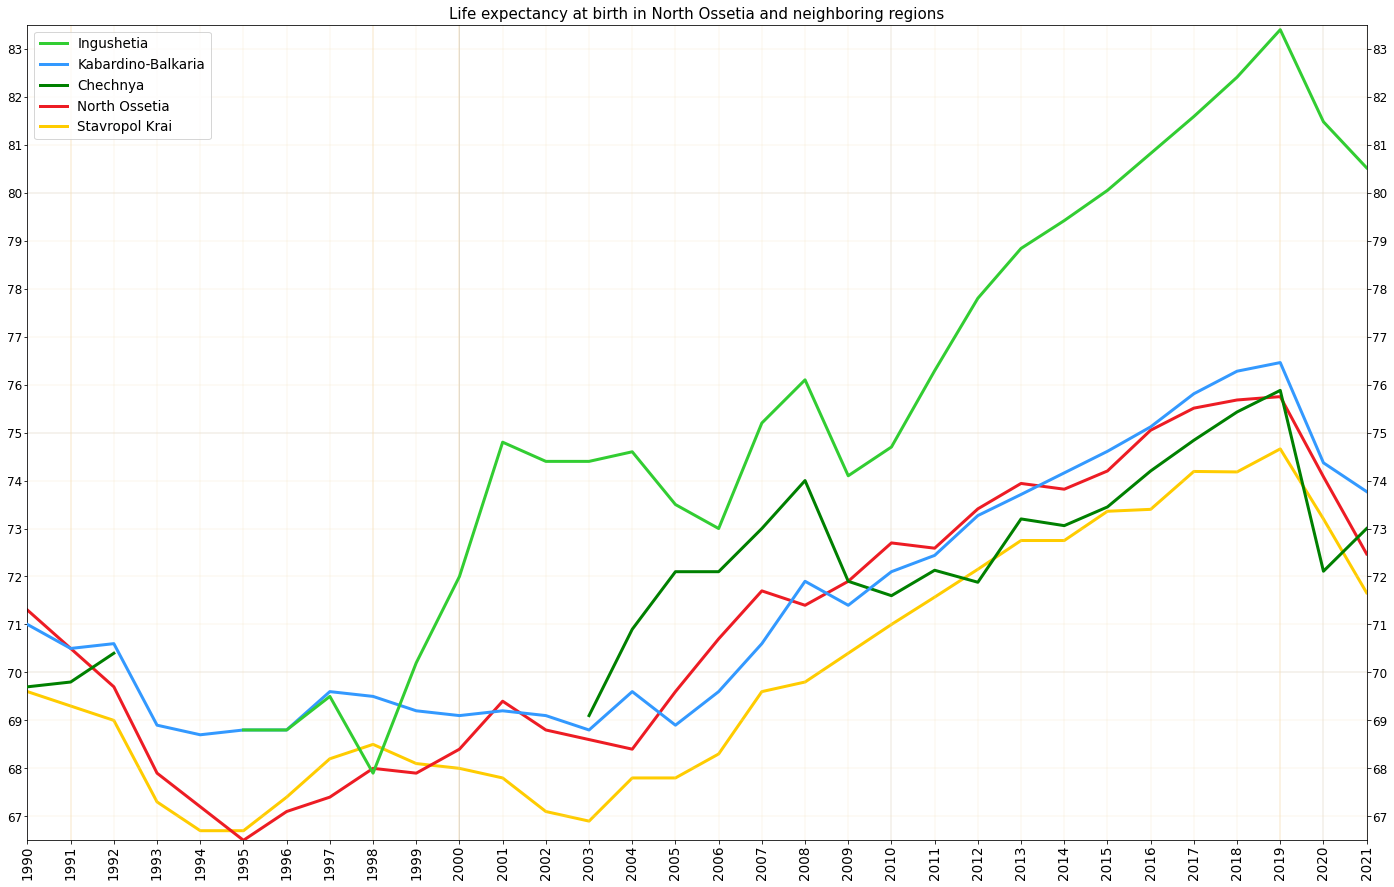

In [38]:
title = TitlePars(label='Life expectancy at birth in North Ossetia and neighboring regions', fontsize=15)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -North_Ossetia.png')

<br />
<br />
<br />

Explore region around [Chechnya](https://en.wikipedia.org/wiki/Chechnya)

In [39]:
# Comparison subjects in the region of the North Caucasus
df = df_all.loc[['Ингушетия',
                 'Дагестан',
                 'Чечня',
                 'Северная Осетия',
                 'Ставропольский край']] \
    .sort_values(by=2021, ascending=False)

df.loc[:, 2003:].fillna('')

2003  2004  2005  2006  2007  2008  2009  2010   2011  \
Ингушетия            74.4  74.6  73.5  73.0  75.2  76.1  74.1  74.7  76.29   
Дагестан             72.3  72.6  73.1  73.2  74.0  74.1  73.7  73.9  74.26   
Чечня                69.1  70.9  72.1  72.1  73.0  74.0  71.9  71.6  72.13   
Северная Осетия      68.6  68.4  69.6  70.7  71.7  71.4  71.9  72.7  72.59   
Ставропольский край  66.9  67.8  67.8  68.3  69.6  69.8  70.4  71.0  71.57   

                      2012   2013   2014   2015   2016   2017   2018   2019  \
Ингушетия            77.80  78.84  79.42  80.05  80.82  81.59  82.41  83.40   
Дагестан             74.90  75.63  75.83  76.39  77.23  77.79  78.69  79.10   
Чечня                71.88  73.20  73.06  73.45  74.20  74.84  75.43  75.88   
Северная Осетия      73.41  73.94  73.82  74.20  75.05  75.51  75.68  75.75   
Ставропольский край  72.15  72.75  72.75  73.36  73.40  74.19  74.18  74.66   

                      2020   2021  
Ингушетия            81.48  80.52  
Дагестан             76.43  76.59  
Чечня                72.11  73.00  
Северная Осетия      74.08  72.47  
Ставропольский край  73.20  71.66

min: 66.90, max: 83.40


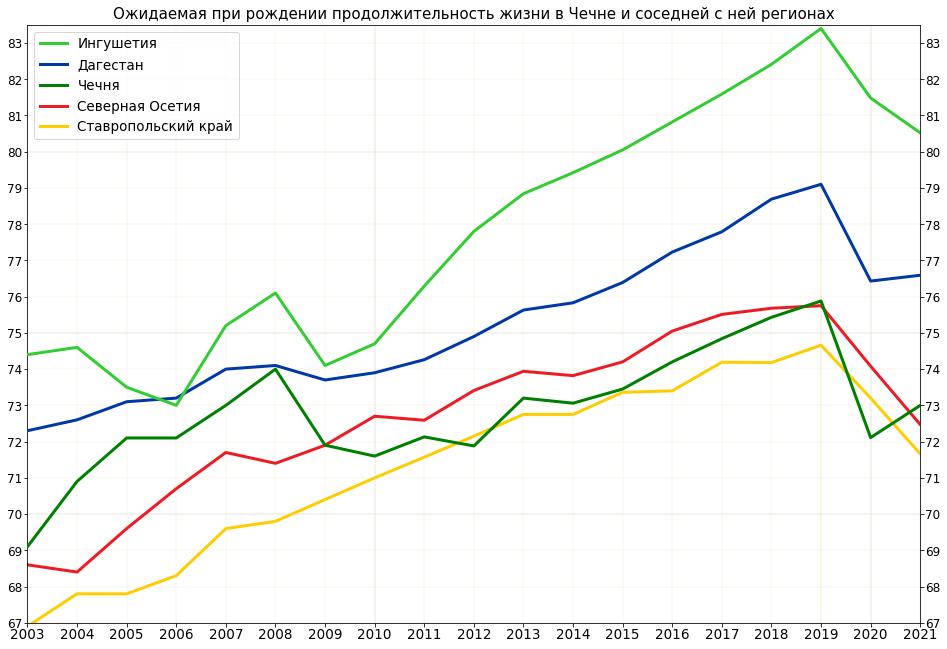

In [40]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Чечне и соседней с ней регионах', fontsize=15)

ls_subjects = {'Ингушетия': 'limegreen',
               'Дагестан': '#0039a6',
               'Чечня': 'green',
               'Северная Осетия': '#ed1c24',
               'Ставропольский край': '#ffcc00'}

figure_size=(16, 11)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=67, up=83.5)
hor_lines = [2019]

create_chart(df_all.loc[:, 2003:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines,
             lang='ru', xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal',
             destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Chechnya -ru.png')

min: 66.90, max: 83.40


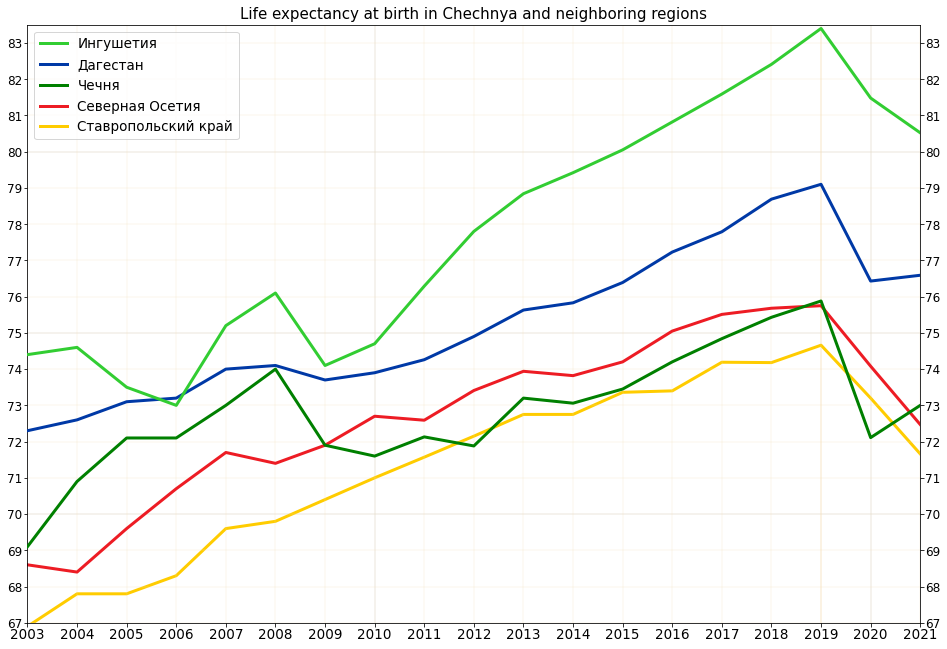

In [41]:
title = TitlePars(label='Life expectancy at birth in Chechnya and neighboring regions', fontsize=15)

create_chart(df_all.loc[:, 2003:], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines,
             lang='ru', xticks_size=13.5, yticks_size=12, label_x_rotation='horizontal',
             destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Chechnya.png')

<br />
<br />
<br />

Explore region around [Dagestan](https://en.wikipedia.org/wiki/Dagestan)

In [42]:
# Comparison subjects in the region of the North Caucasus
df = df_all.loc[['Дагестан',
                 'Чечня',
                 'Ставропольский край',
                 'Калмыкия']] \
    .sort_values(by=2021, ascending=False)

df.fillna('')

1990  1991  1992  1993  1994  1995  1996  1997  1998  \
Дагестан             73.1  72.6  72.1  70.5  70.5  70.4  70.3  70.5  70.5   
Чечня                69.7  69.8  70.4                                       
Ставропольский край  69.6  69.3  69.0  67.3  66.7  66.7  67.4  68.2  68.5   
Калмыкия             68.2  68.0  67.8  65.9  65.8  65.0  66.3  66.8  66.3   

                     1999  2000  2001  2002  2003  2004  2005  2006  2007  \
Дагестан             70.6  71.0  71.9  71.9  72.3  72.6  73.1  73.2  74.0   
Чечня                                        69.1  70.9  72.1  72.1  73.0   
Ставропольский край  68.1  68.0  67.8  67.1  66.9  67.8  67.8  68.3  69.6   
Калмыкия             65.9  65.4  66.3  65.1  65.9  67.5  67.2  67.9  68.7   

                     2008  2009  2010   2011   2012   2013   2014   2015  \
Дагестан             74.1  73.7  73.9  74.26  74.90  75.63  75.83  76.39   
Чечня                74.0  71.9  71.6  72.13  71.88  73.20  73.06  73.45   
Ставропольский край  69.8  70.4  71.0  71.57  72.15  72.75  72.75  73.36   
Калмыкия             69.4  69.0  69.4  70.80  71.22  71.35  72.03  72.15   

                      2016   2017   2018   2019   2020   2021  
Дагестан             77.23  77.79  78.69  79.10  76.43  76.59  
Чечня                74.20  74.84  75.43  75.88  72.11  73.00  
Ставропольский край  73.40  74.19  74.18  74.66  73.20  71.66  
Калмыкия             73.35  73.54  73.84  74.84  72.93  71.40

min: 65.00, max: 79.10


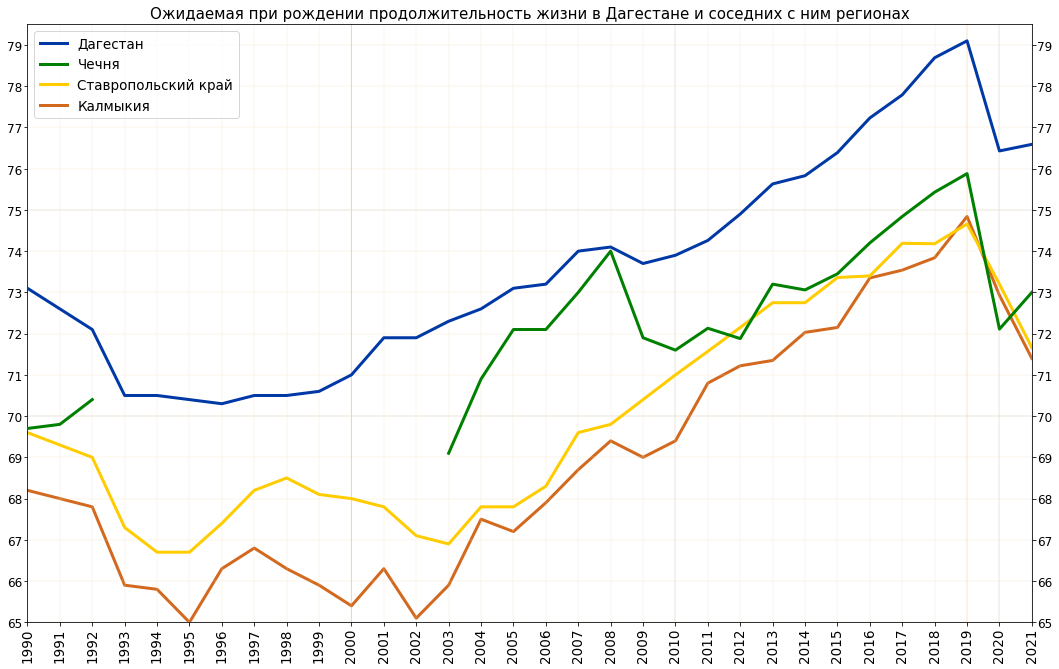

In [43]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в Дагестане и соседних с ним регионах', fontsize=15)

ls_subjects = {'Дагестан': '#0039a6',
               'Чечня': 'green',
               'Ставропольский край': '#ffcc00',
               'Калмыкия': 'chocolate'}  # rosybrown

figure_size=(18, 11)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=65, up=79.5)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Dagestan -ru.png')

min: 65.00, max: 79.10


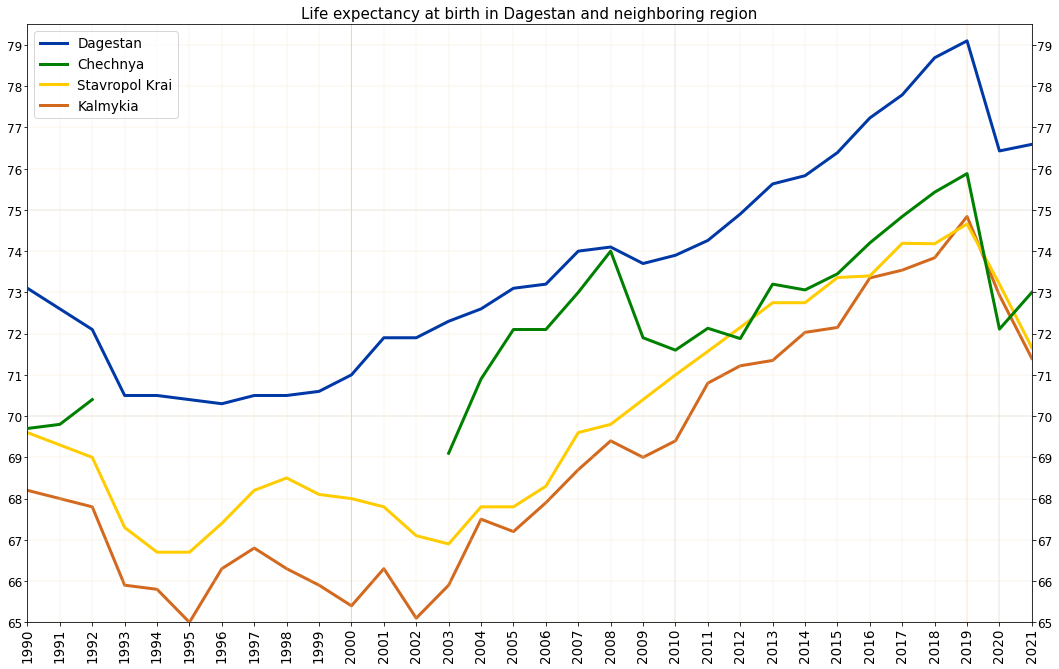

In [44]:
title = TitlePars(label='Life expectancy at birth in Dagestan and neighboring region', fontsize=15)

create_chart(df_all, ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia -Dagestan.png')

<br />
<br />
<br />
<br />
<br />
<br />

---

Just for interest, compare data for Russian regions of the North Caucasus (according to Rosstat) with data for states of the South Caucasus (according to the World Bank Group).

In [45]:
# Comparison subjects of the North Caucasian Federal District
df = df_all.loc[['Дагестан',
                 'Ингушетия',
                 'Кабардино-Балкария',
                 'Карачаево-Черкесия',
                 'Северная Осетия',
                 'Чечня',
                 'Ставропольский край',
                 'Адыгея',
                 'Краснодарский край',
                 #'Чеченская и Ингушская Республики',
                 'Россия']] \
    .sort_values(by=2021, ascending=False).rename(index={'Россия': 'Россия (Росстат)'})

In [92]:
# Load additional info about South Caucasus states from database of the World Band Group
df_wbg = pd.read_csv('data/World_Bank_Group-total.csv', skiprows=4, index_col=0)  \
           .loc[['Armenia', 'Azerbaijan', 'Georgia', 'Russian Federation']] \
           .iloc[:, 33:-2]  \
           .rename(columns = int,
                   index = {'Russian Federation':'Россия (Группа Всемирного банка)',
                            'Georgia': 'Грузия',
                            'Azerbaijan': 'Азербайджан',
                            'Armenia': 'Армения'})

df_wbg

1990      1991       1992       1993  \
Country Name                                                                  
Армения                           68.821000  68.64300  68.627000  68.841000   
Азербайджан                       62.352000  62.05200  61.296000  61.286000   
Грузия                            68.389000  68.24500  67.783000  67.656000   
Россия (Группа Всемирного банка)  68.886098  68.47439  66.873171  64.935854   

                                       1994       1995       1996      1997  \
Country Name                                                                  
Армения                           69.073000  69.311000  69.783000  69.91000   
Азербайджан                       61.594000  62.305000  62.622000  62.97300   
Грузия                            68.554000  68.851000  68.974000  69.05900   
Россия (Группа Всемирного банка)  64.467073  64.690732  65.854146  66.69878   

                                       1998       1999       2000       2001  \
Country Name                                                                   
Армения                           70.514000  70.257000  70.624000  70.932000   
Азербайджан                       63.561000  64.189000  64.891000  65.510000   
Грузия                            69.102000  69.319000  69.575000  69.606000   
Россия (Группа Всемирного банка)  67.029756  65.982195  65.483659  65.383415   

                                      2002       2003       2004       2005  \
Country Name                                                                  
Армения                           71.01800  71.436000  71.421000  71.792000   
Азербайджан                       66.23900  66.756000  67.346000  67.562000   
Грузия                            70.02400  70.333000  70.567000  71.130000   
Россия (Группа Всемирного банка)  65.12878  65.027561  65.470976  65.529756   

                                       2006       2007       2008       2009  \
Country Name                                                                   
Армения                           71.987000  72.327000  72.398000  72.813000   
Азербайджан                       68.165000  68.603000  68.811000  69.356000   
Грузия                            71.394000  71.568000  71.332000  71.950000   
Россия (Группа Всемирного банка)  66.727561  67.586829  67.949268  68.684634   

                                      2010       2011       2012      2013  \
Country Name                                                                 
Армения                           73.16000  73.305000  73.454000  73.67600   
Азербайджан                       69.52900  69.984000  70.360000  70.88100   
Грузия                            72.12800  72.390000  72.412000  72.62800   
Россия (Группа Всемирного банка)  68.84122  69.683902  70.072195  70.57878   

                                       2014       2015      2016       2017  \
Country Name                                                                  
Армения                           74.058000  74.436000  74.66400  74.906000   
Азербайджан                       71.116000  71.451000  72.00400  72.248000   
Грузия                            73.099000  73.297000  73.56900  73.570000   
Россия (Группа Всемирного банка)  70.743659  71.183415  71.65122  72.451463   

                                       2018       2019      2020  
Country Name                                                      
Армения                           75.064000  75.439000  72.17300  
Азербайджан                       72.760000  73.102000  66.86800  
Грузия                            73.341000  73.470000  72.76500  
Россия (Группа Всемирного банка)  72.662195  73.083902  71.33878

In [93]:
df_caucasus = pd.concat([df, df_wbg]).sort_values(by=2019, ascending=False)
df_caucasus.loc[:, :].loc[:, 1998:].round(2).fillna('')

1998   1999   2000   2001   2002   2003  \
Ингушетия                          67.9   70.2   72.0   74.8   74.4  74.40   
Дагестан                           70.5   70.6   71.0   71.9   71.9  72.30   
Кабардино-Балкария                 69.5   69.2   69.1   69.2   69.1  68.80   
Карачаево-Черкесия                 69.3   68.7   68.4   69.1   68.7  68.20   
Чечня                                                                69.10   
Северная Осетия                    68.0   67.9   68.4   69.4   68.8  68.60   
Армения                           70.51  70.26  70.62  70.93  71.02  71.44   
Ставропольский край                68.5   68.1   68.0   67.8   67.1  66.90   
Краснодарский край                 68.0   67.7   67.1   67.2   67.0  67.20   
Адыгея                             68.5   68.6   67.6   68.1   67.9  67.40   
Грузия                             69.1  69.32  69.58  69.61  70.02  70.33   
Россия (Росстат)                   67.1   65.9   65.3   65.2   65.0  64.90   
Азербайджан                       63.56  64.19  64.89  65.51  66.24  66.76   
Россия (Группа Всемирного банка)  67.03  65.98  65.48  65.38  65.13  65.03   

                                   2004   2005   2006   2007   2008   2009  \
Ингушетия                         74.60  73.50  73.00  75.20  76.10  74.10   
Дагестан                          72.60  73.10  73.20  74.00  74.10  73.70   
Кабардино-Балкария                69.60  68.90  69.60  70.60  71.90  71.40   
Карачаево-Черкесия                69.80  69.60  70.70  71.90  72.20  72.30   
Чечня                             70.90  72.10  72.10  73.00  74.00  71.90   
Северная Осетия                   68.40  69.60  70.70  71.70  71.40  71.90   
Армения                           71.42  71.79  71.99  72.33  72.40  72.81   
Ставропольский край               67.80  67.80  68.30  69.60  69.80  70.40   
Краснодарский край                67.50  67.60  68.80  69.30  69.80  70.80   
Адыгея                            67.80  68.10  68.30  68.80  68.60  69.90   
Грузия                            70.57  71.13  71.39  71.57  71.33  71.95   
Россия (Росстат)                  65.30  65.40  66.70  67.60  68.00  68.80   
Азербайджан                       67.35  67.56  68.17  68.60  68.81  69.36   
Россия (Группа Всемирного банка)  65.47  65.53  66.73  67.59  67.95  68.68   

                                   2010   2011   2012   2013   2014   2015  \
Ингушетия                         74.70  76.29  77.80  78.84  79.42  80.05   
Дагестан                          73.90  74.26  74.90  75.63  75.83  76.39   
Кабардино-Балкария                72.10  72.44  73.27  73.71  74.16  74.61   
Карачаево-Черкесия                72.40  72.85  73.38  73.94  73.91  74.44   
Чечня                             71.60  72.13  71.88  73.20  73.06  73.45   
Северная Осетия                   72.70  72.59  73.41  73.94  73.82  74.20   
Армения                           73.16  73.31  73.45  73.68  74.06  74.44   
Ставропольский край               71.00  71.57  72.15  72.75  72.75  73.36   
Краснодарский край                71.00  71.15  71.74  72.29  72.28  72.53   
Адыгея                            70.00  70.99  71.68  71.80  72.01  72.22   
Грузия                            72.13  72.39  72.41  72.63  73.10  73.30   
Россия (Росстат)                  68.90  69.83  70.24  70.76  70.93  71.39   
Азербайджан                       69.53  69.98  70.36  70.88  71.12  71.45   
Россия (Группа Всемирного банка)  68.84  69.68  70.07  70.58  70.74  71.18   

                                   2016   2017   2018   2019   2020   2021  
Ингушетия                         80.82  81.59  82.41  83.40  81.48  80.52  
Дагестан                          77.23  77.79  78.69  79.10  76.43  76.59  
Кабардино-Балкария                75.12  75.81  76.28  76.46  74.37  73.77  
Карачаево-Черкесия                74.72  75.94  76.09  76.21  74.82  73.47  
Чечня                             74.20  74.84  75.43  75.88  72.11   73.0  
Северная Осетия                   75.05  75.51  75.68  75.75

min: 61.29, max: 83.40


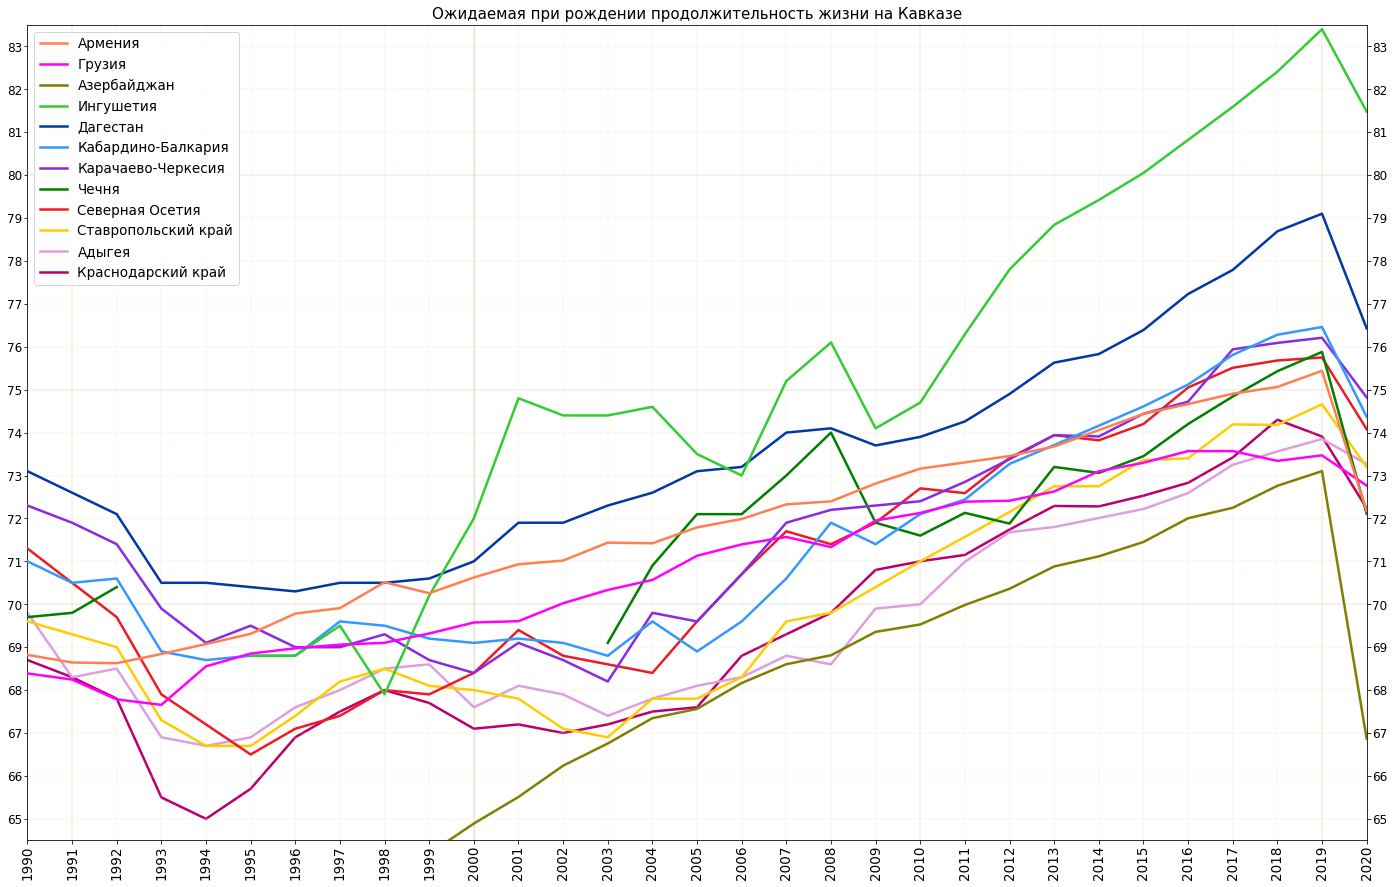

In [94]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни на Кавказе', fontsize=15)

ls_subjects = {
               'Армения': 'coral',
               'Грузия': 'fuchsia',
               'Азербайджан': 'olive',
               'Ингушетия': 'limegreen',
               'Дагестан': '#0039a6',
               'Кабардино-Балкария': '#3399ff',
               'Карачаево-Черкесия': 'blueviolet',
               'Чечня': 'green',
               'Северная Осетия': '#ed1c24',
               'Ставропольский край': '#ffcc00',
               'Адыгея': 'plum',
               'Краснодарский край': '#ba006e'
              }

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=64.5, up=83.5)
hor_lines = [1991, 2000, 2019]

create_chart(df_caucasus.loc[:, :2020], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination='show', file_name='Life expectancy in Caucasus -ru.png')

min: 61.29, max: 83.40
Data has written to file


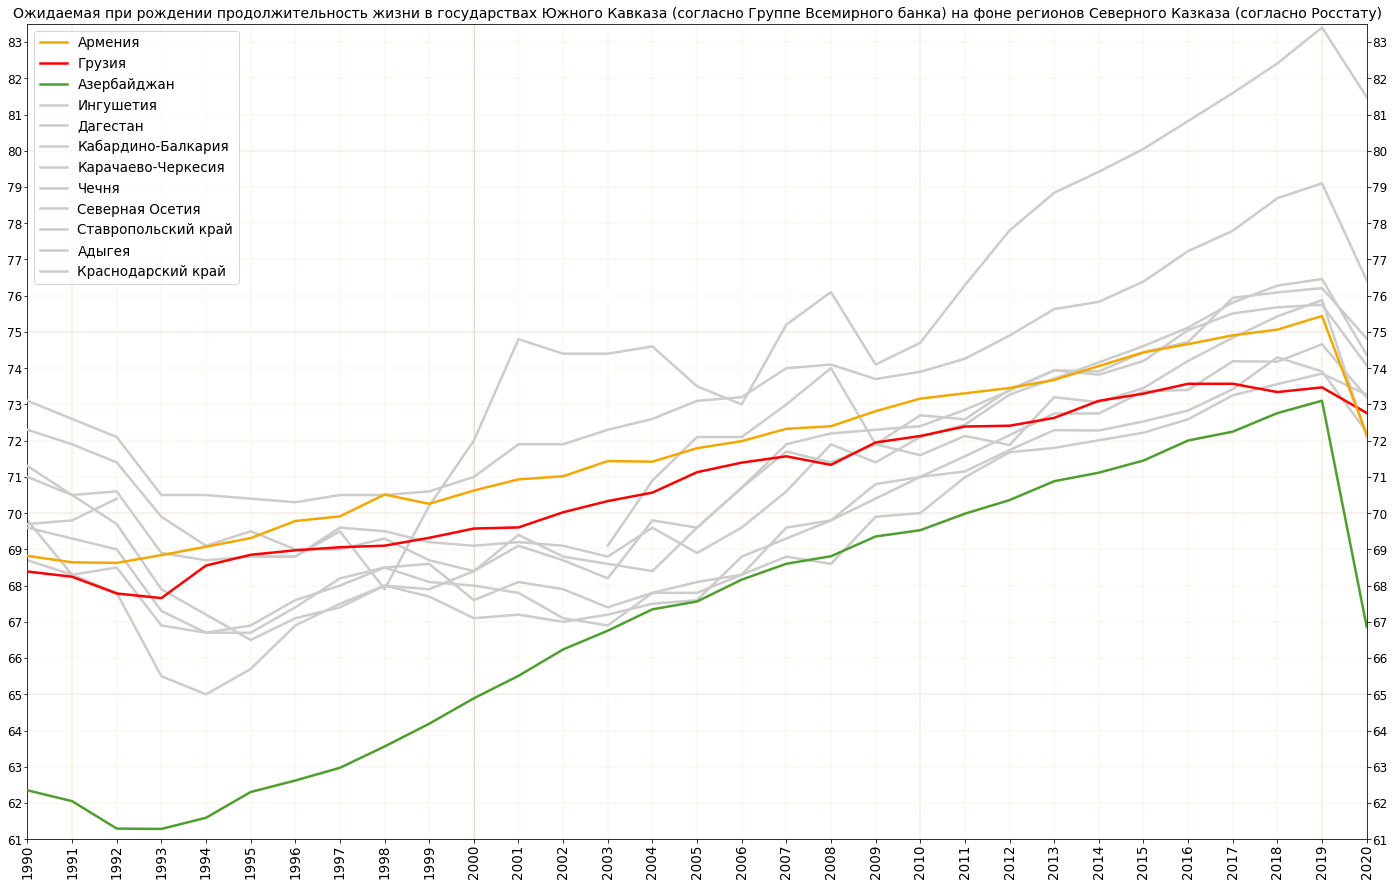

In [102]:
title = TitlePars(label='Ожидаемая при рождении продолжительность жизни в государствах Южного Кавказа (согласно Группе Всемирного банка) на фоне регионов Северного Казказа (согласно Росстату)', fontsize=14)

ls_subjects = {'Армения': '#f2a800',
               'Грузия': 'red',
               'Азербайджан': '#509e2f',
               'Ингушетия': '#CCCCCC',
               'Дагестан': '#CCCCCC',
               'Кабардино-Балкария': '#CCCCCC',
               'Карачаево-Черкесия': '#CCCCCC',
               'Чечня': '#CCCCCC',
               'Северная Осетия': '#CCCCCC',
               'Ставропольский край': '#CCCCCC',
               'Адыгея': '#CCCCCC',
               'Краснодарский край': '#CCCCCC'
              }

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=61, up=83.5)
hor_lines = [1991, 2000, 2019]

create_chart(df_caucasus.loc[:, :2020], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in South Caucasus with background -ru.png')

min: 61.29, max: 83.40
Data has written to file


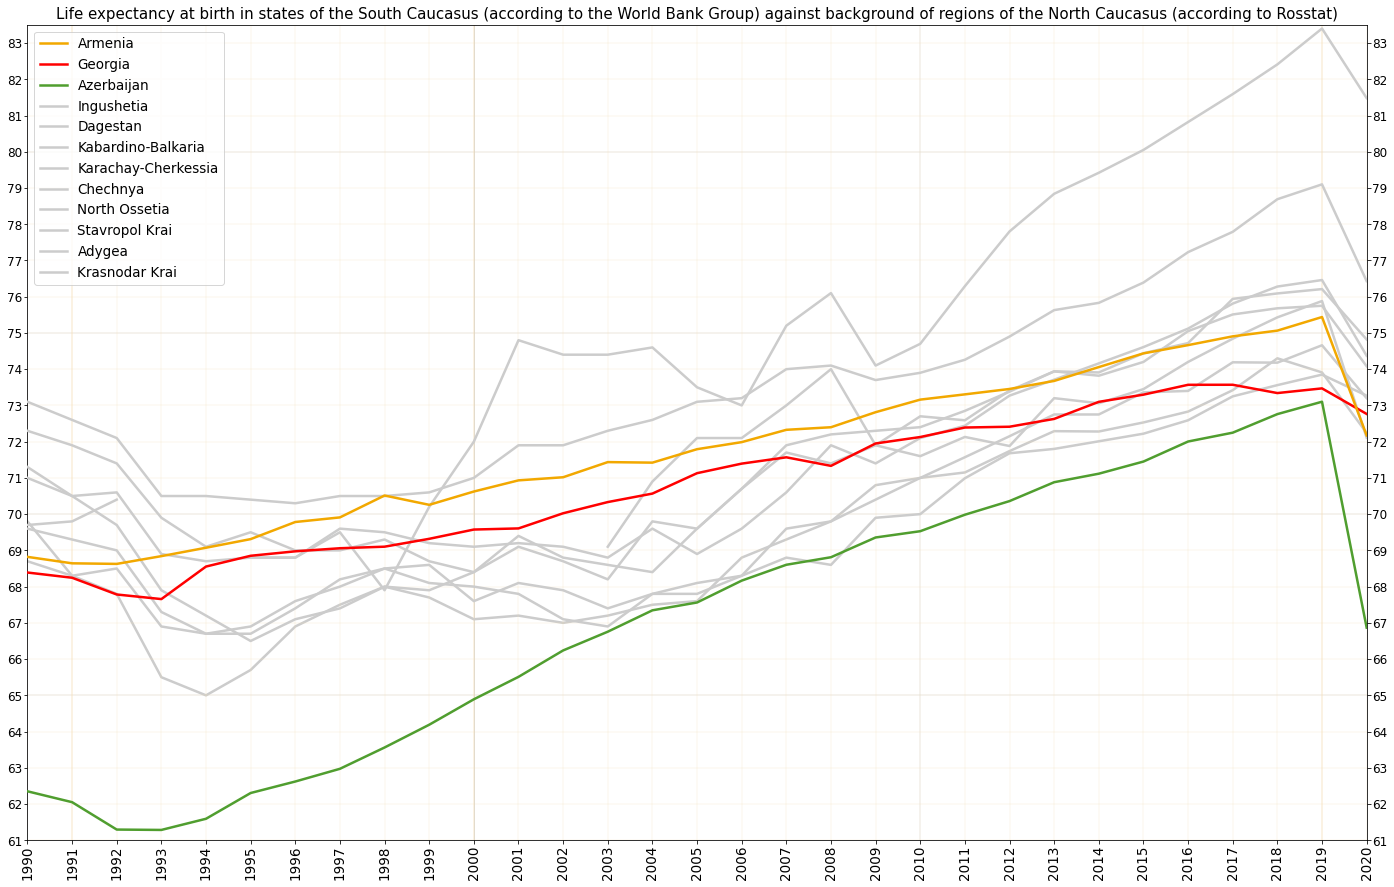

In [103]:
title = TitlePars(label='Life expectancy at birth in states of the South Caucasus (according to the World Bank Group) against background of regions of the North Caucasus (according to Rosstat)', fontsize=15)

create_chart(df_caucasus.loc[:, :2020], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, chart_linewidth=2.5, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in South Caucasus with background.png')

<br />
<br />

min: 63.90, max: 73.34


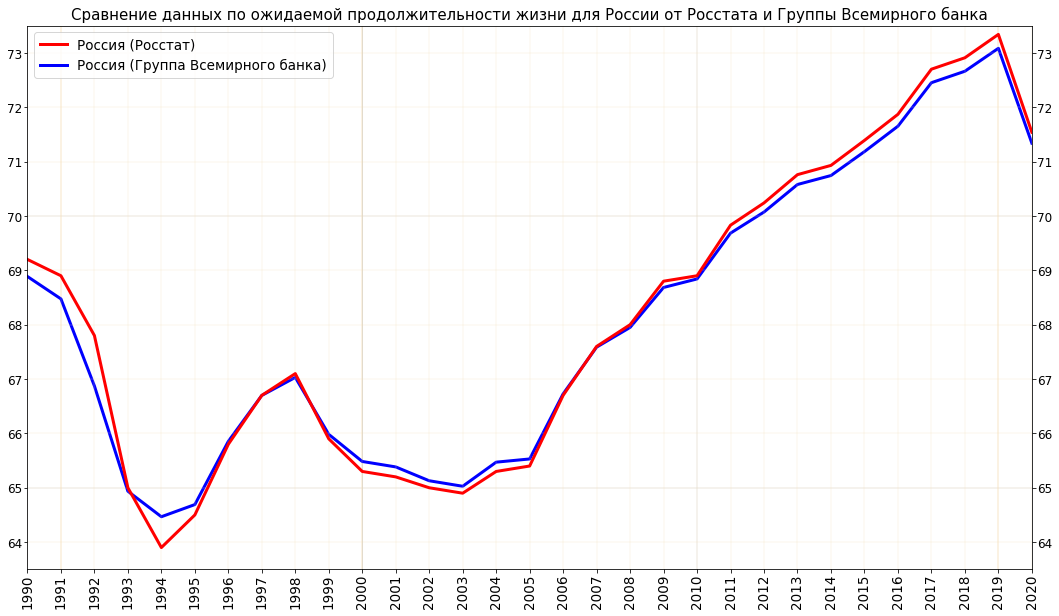

In [100]:
title = TitlePars(label='Сравнение данных по ожидаемой продолжительности жизни для России от Росстата и Группы Всемирного банка', fontsize=15)

ls_subjects = {'Россия (Росстат)': 'red',
               'Россия (Группа Всемирного банка)': 'blue'}

figure_size=(18, 10)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=63.5, up=73.5)

create_chart(df_caucasus.loc[:, :2020], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='ru',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Comparison of LE for Russia by Rosstat and WBG -ru.png')

min: 63.90, max: 73.34
Data has written to file


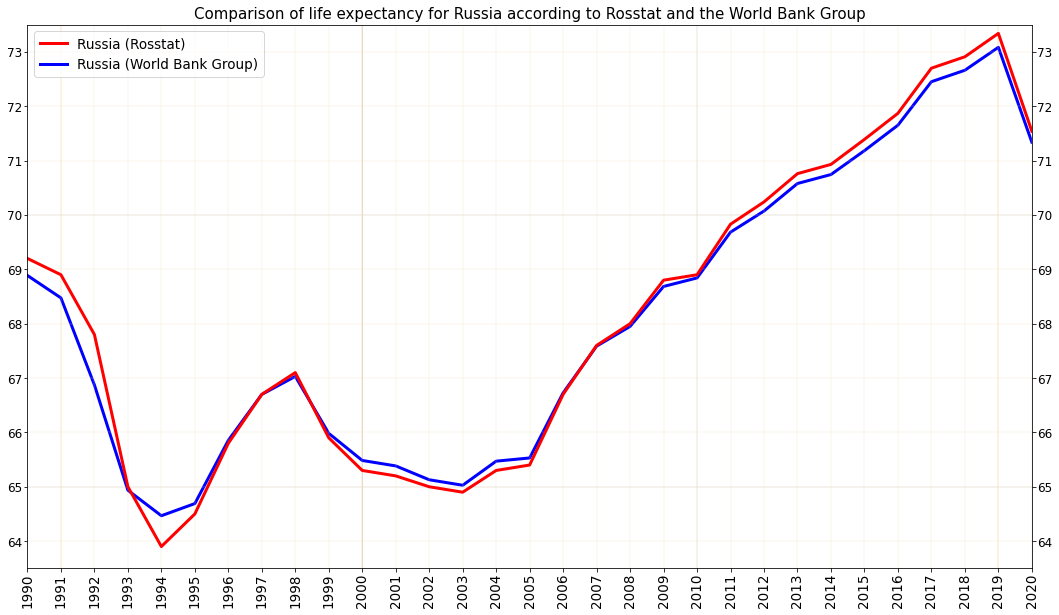

In [53]:
title = TitlePars(label='Comparison of life expectancy for Russia according to Rosstat and the World Bank Group', fontsize=15)

create_chart(df_caucasus.loc[:, :2020], ls_subjects, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, hor_lines=hor_lines, lang='en',
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Comparison of LE for Russia by Rosstat and WBG.png')